In [1]:
import orbipy as op
import numpy as np
import pandas as pd

In [39]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
zero_state = model.get_zero_state()
one_thousand_kms = (1-model.L1)/58

zero_state[4] = 100000/model.R

x_axis = np.linspace(model.L1 - 10 * one_thousand_kms, model.L1 + 10 * one_thousand_kms, 10)
z_axis = np.linspace(0, 20 * one_thousand_kms, 5)

left = op.eventX(model.L1 - 12 * one_thousand_kms)
right = op.eventX(model.L1 + 12 * one_thousand_kms)

In [35]:
def start_state_map(x_axis, z_axis, left, right, model, N, path):
    start_state_array_valid = []
    start_state_array_invalid = []
    
    for x in x_axis:
        for z in z_axis:
            zero_state = model.get_zero_state()
            zero_state[[0, 2]] = x, z
            first_correction = op.border_correction(model, op.y_direction(), left, right)
            correction = op.border_correction(model, op.unstable_direction(model), left, right)
            impulse_correction_method = op.strict_station_keeping(model, first_correction, correction, np.pi/2)
            try:
                df = impulse_correction_method.prop(0.0, zero_state, N=N)
            except (RuntimeError, ValueError) as e:
                print(e, sep=' ')  
                start_state_array_invalid.append([x,z,0])
                continue
            finally:
                print(x, z)        
            start_state_array_valid.append([x,z,df['vy'].iloc[0]])
            pd.DataFrame.to_csv(df, f'{path}orbit_{x}_{z}_{df['vy'].iloc[0]}.csv')
            
    return start_state_array_valid, start_state_array_invalid

In [27]:
valid_data, invalid_data = start_state_map(x_axis, z_axis, left, right, model, 2 * 50, '../data/orbits/')

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.8087541732520093 0.0
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.8087541732520093 0.014062193143234616
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: dopri5: problem is probably stiff (interrupted)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


Borders unreachable
0.82125390049044 0.0
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.82125390049044 0.014062193143234616
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.82125390049044 0.02812438628646923
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 

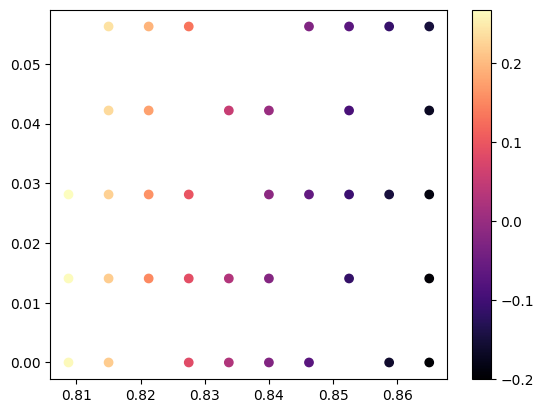

In [28]:
import matplotlib.pyplot as plt

start_state_array = np.array(valid_data)
plt.scatter(start_state_array[:,0], start_state_array[:,1], c=start_state_array[:,2], cmap='magma')
plt.colorbar()
plt.show()

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element 

IsADirectoryError: [Errno 21] Is a directory: 'data/orbits/1'

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


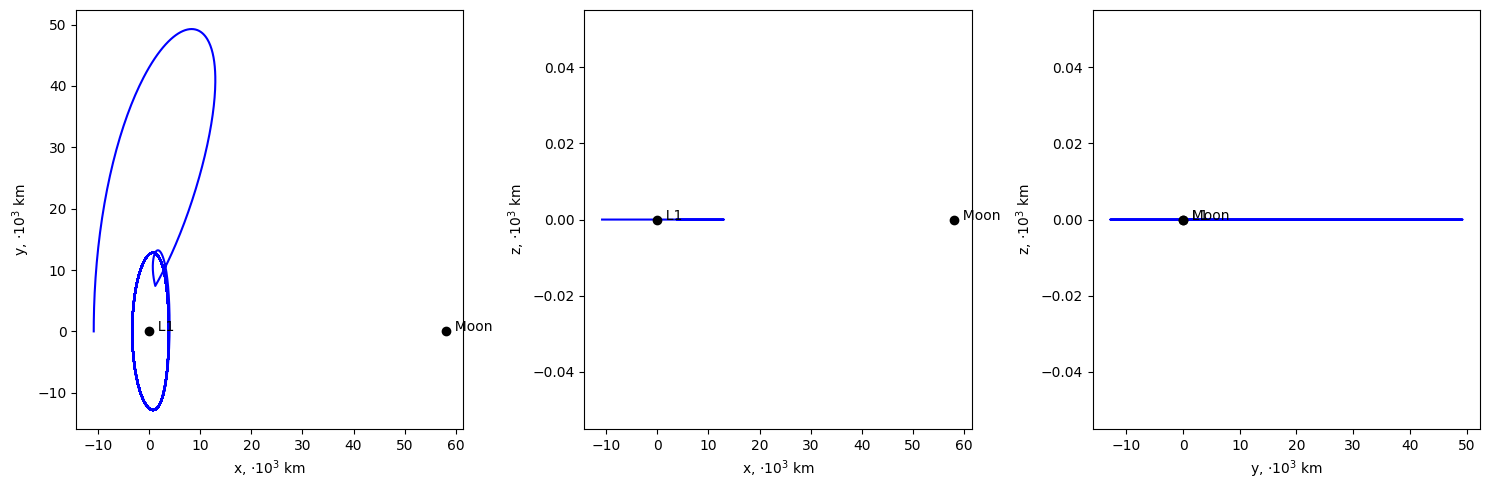

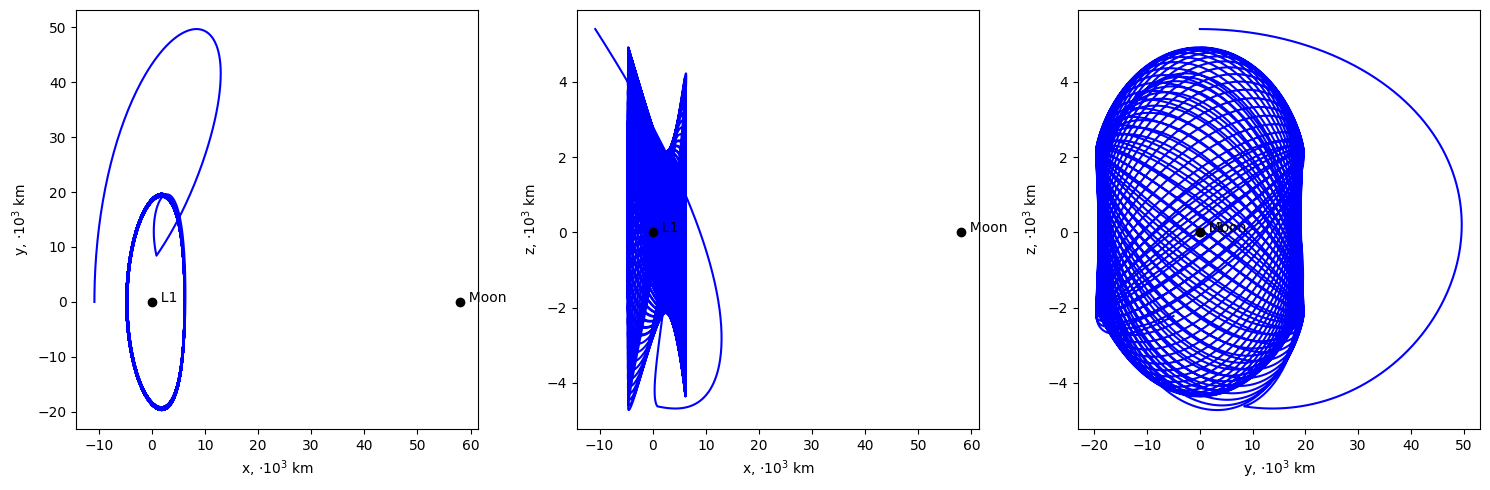

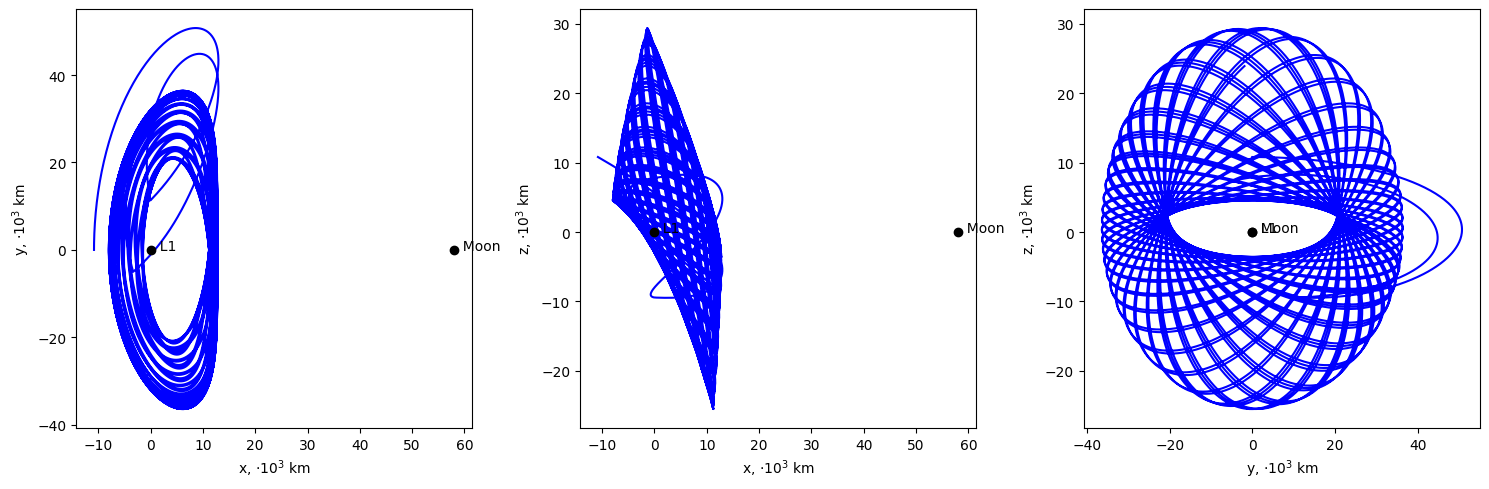

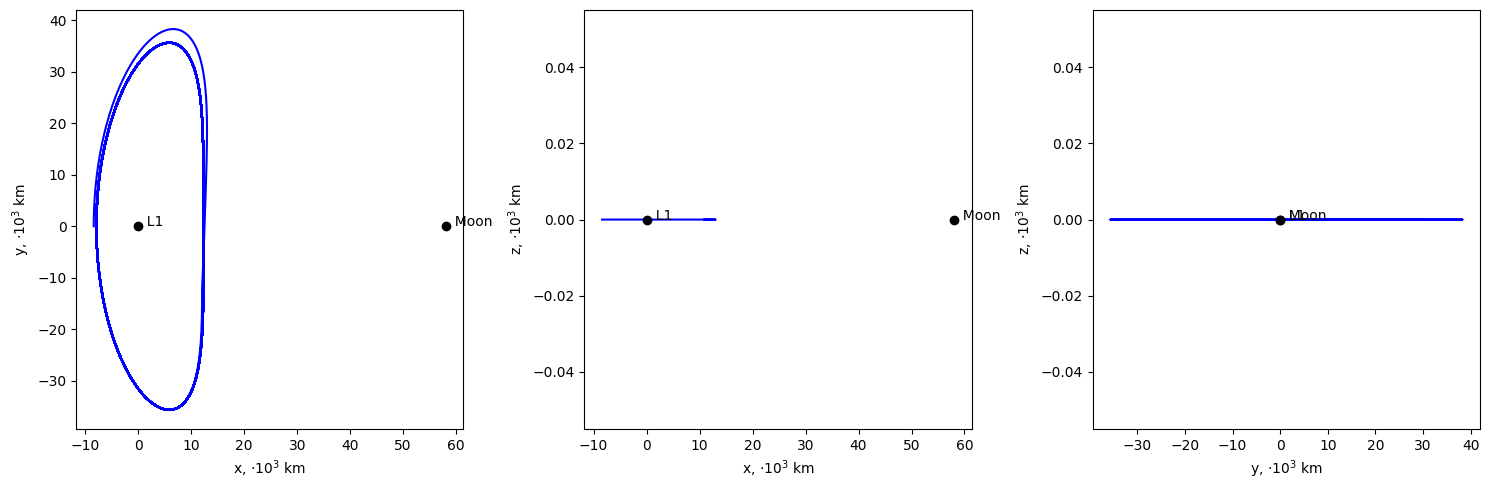

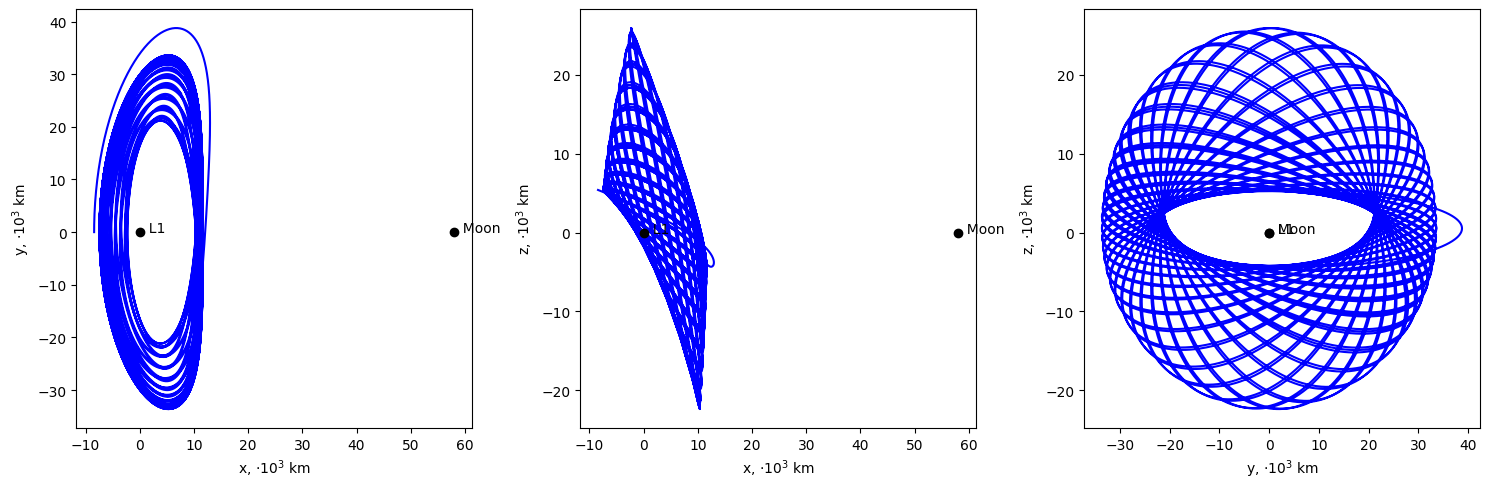

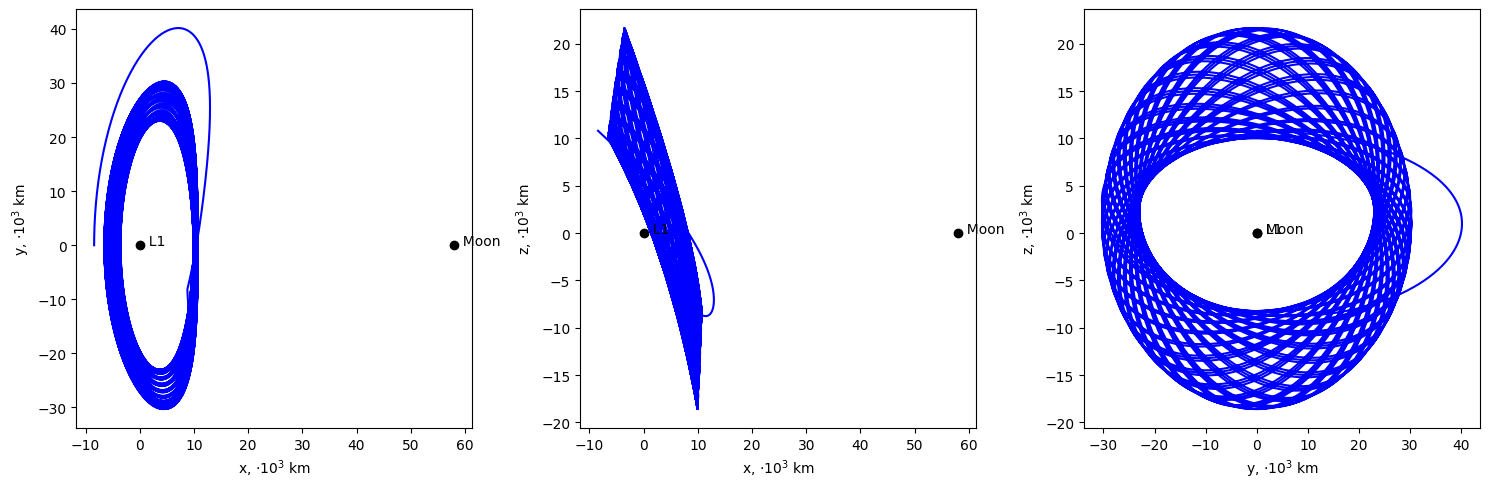

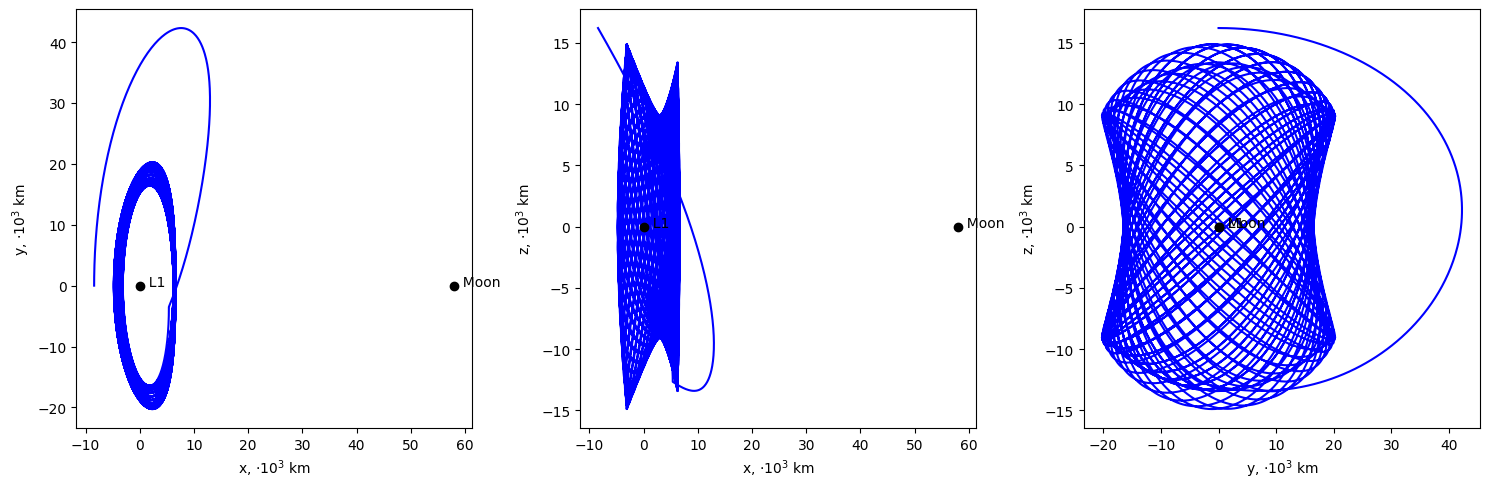

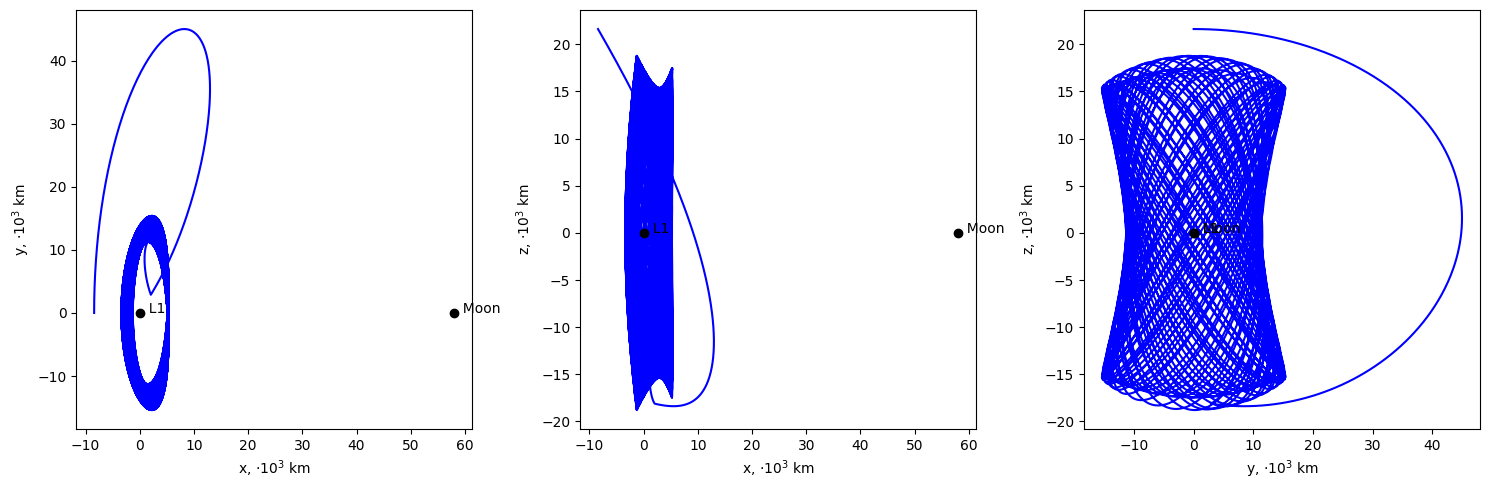

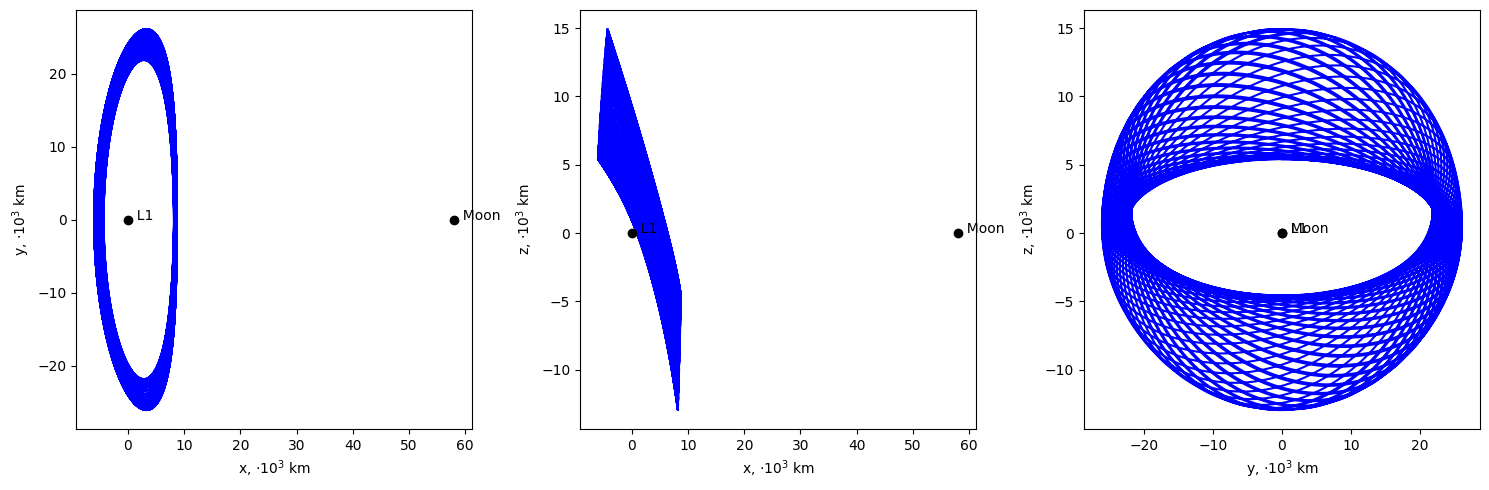

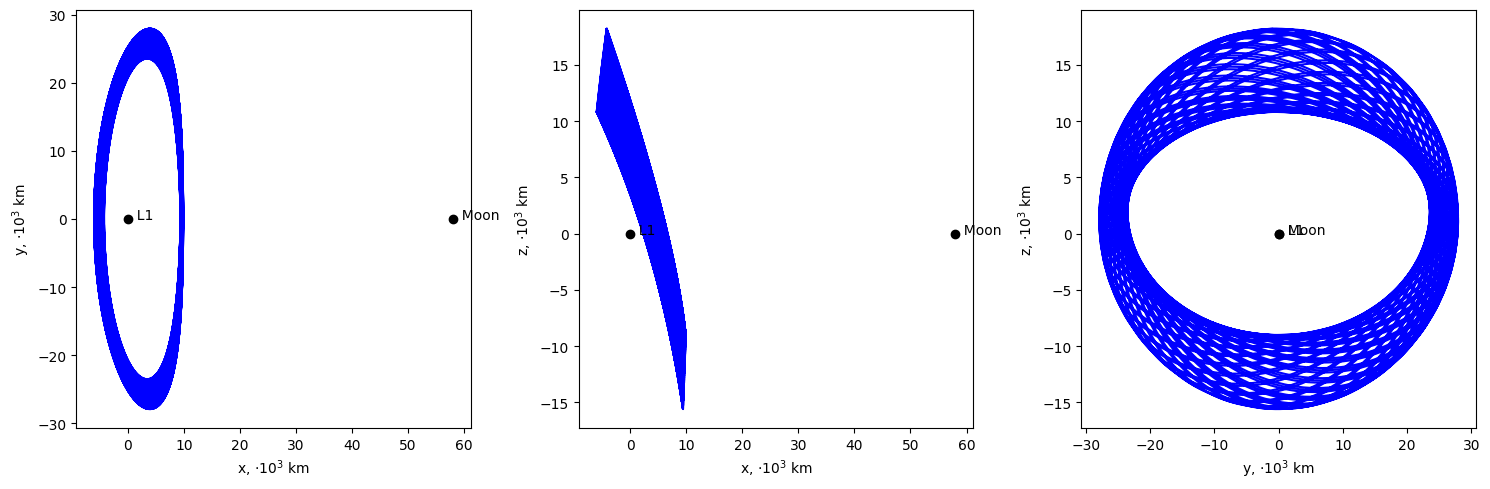

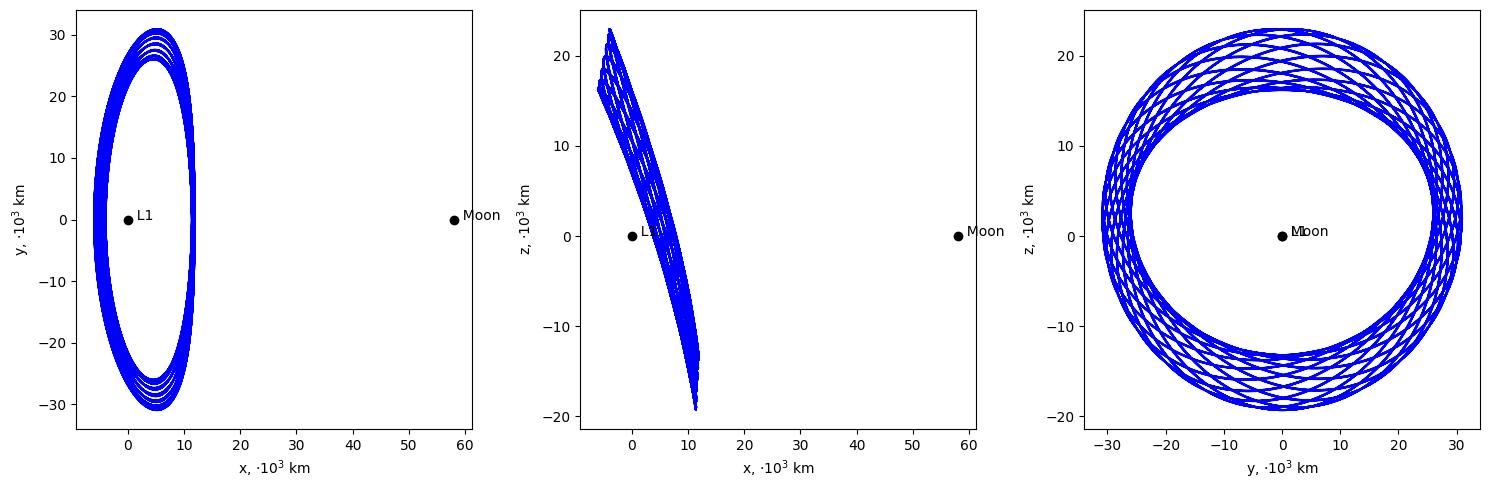

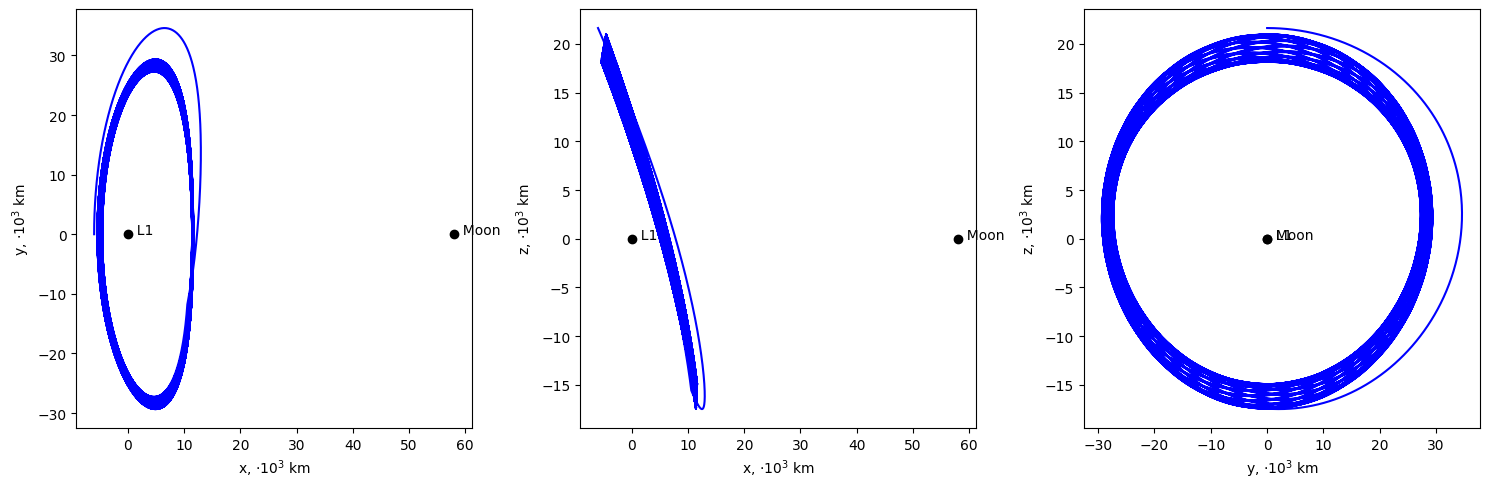

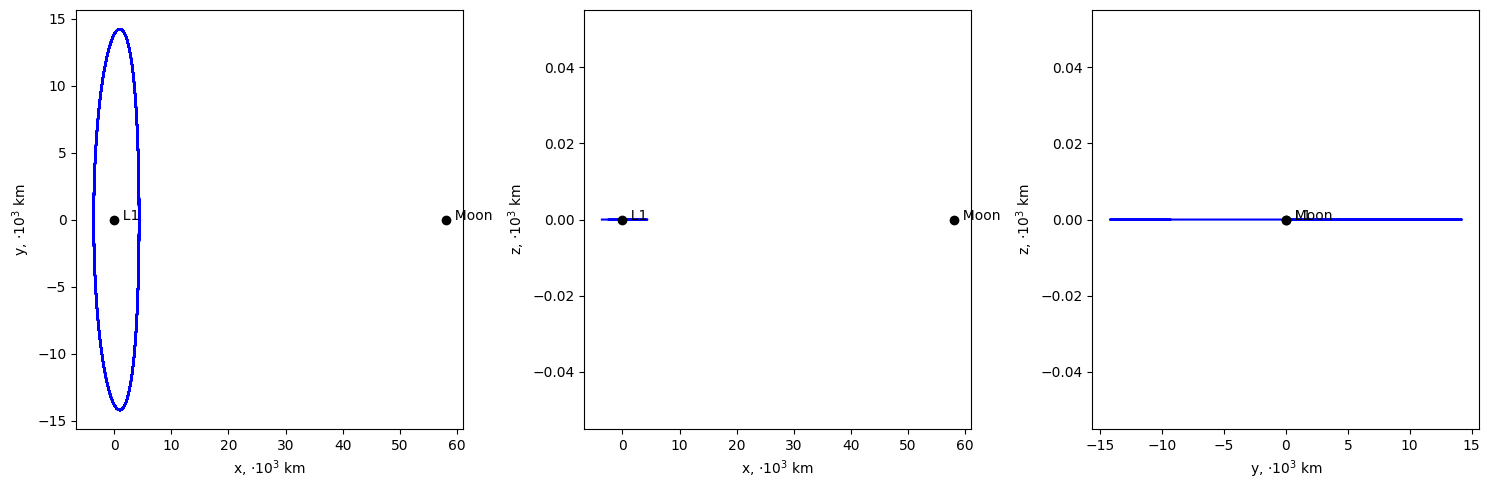

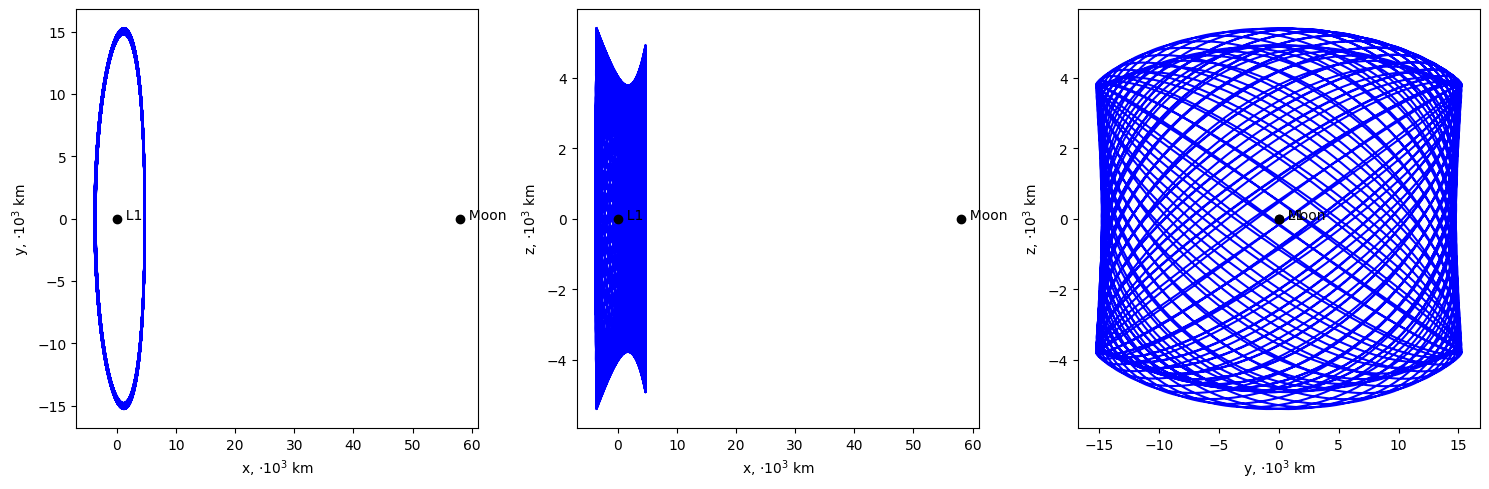

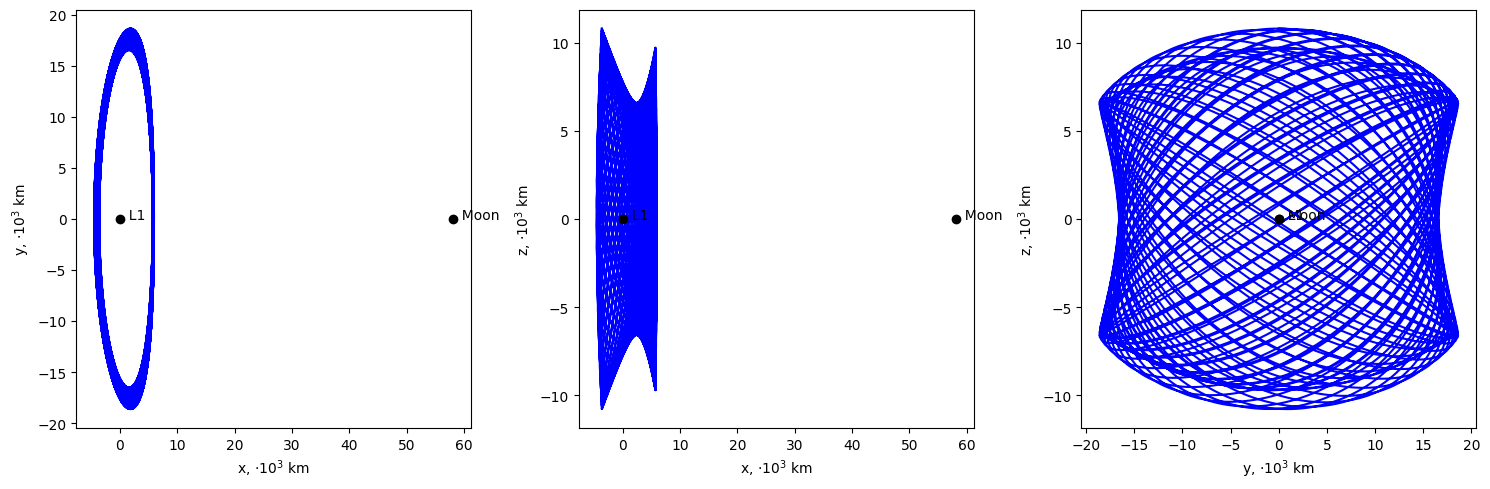

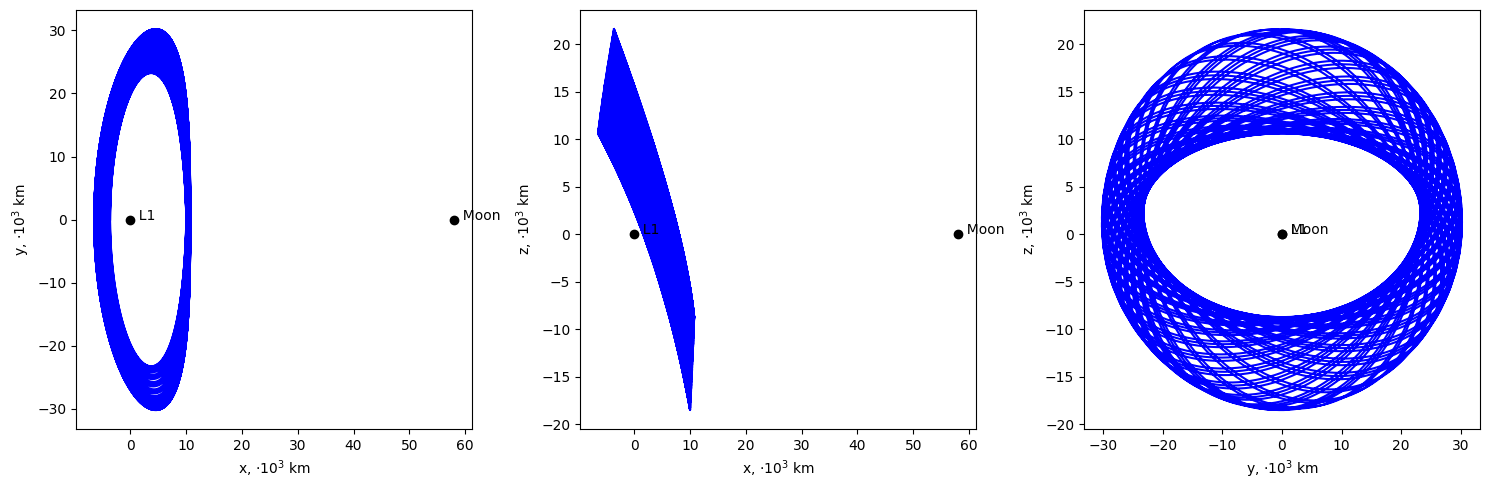

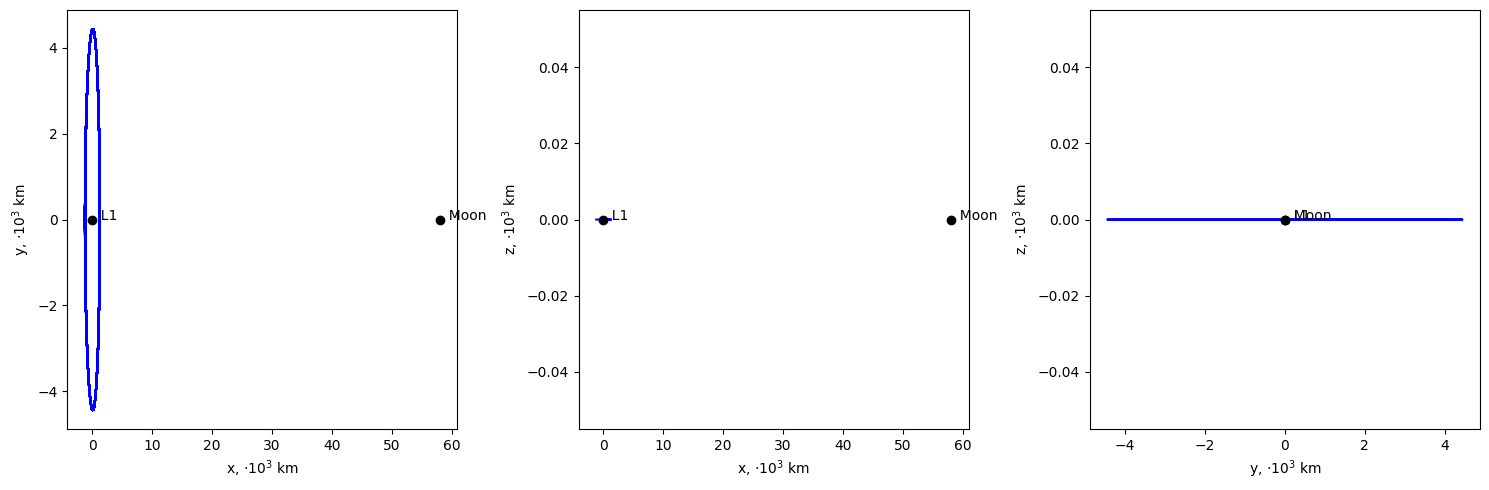

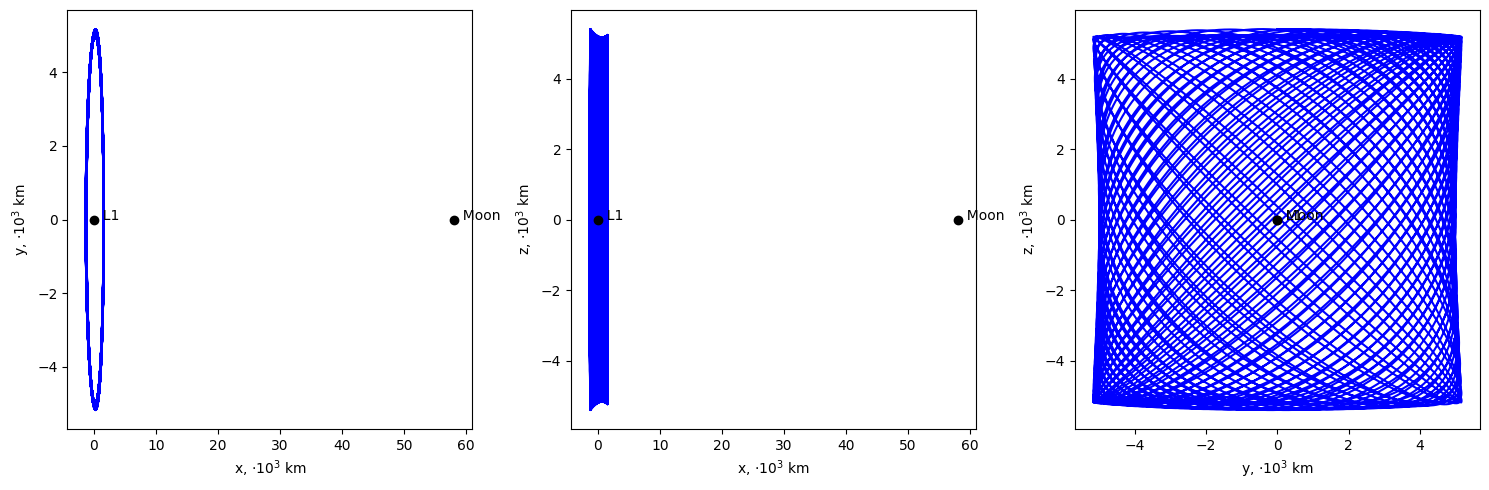

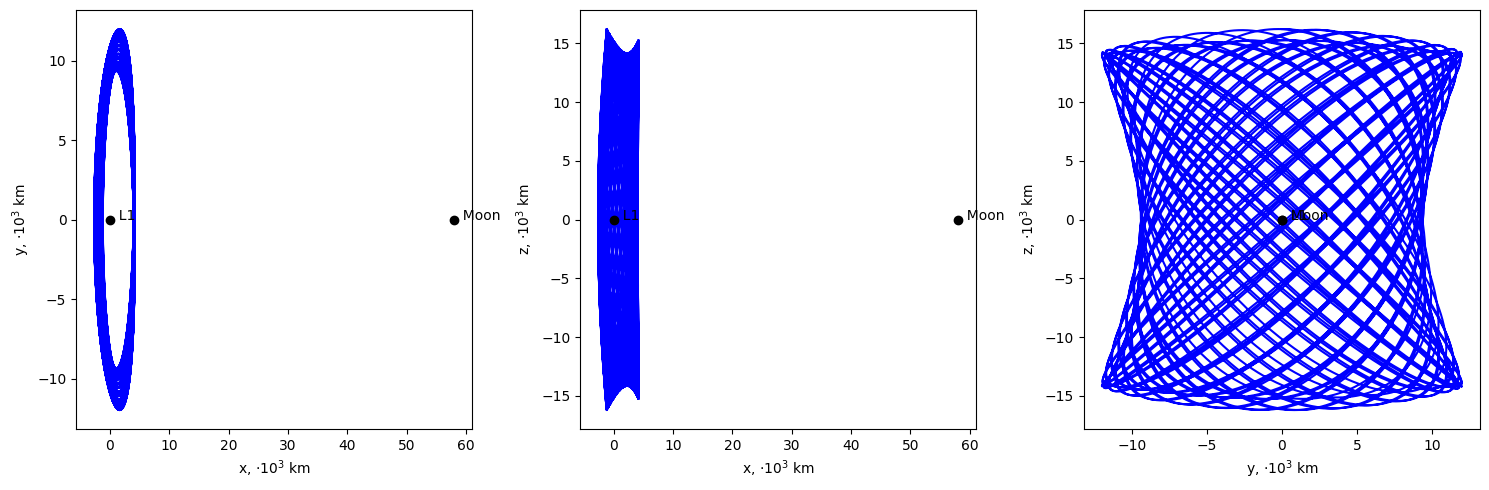

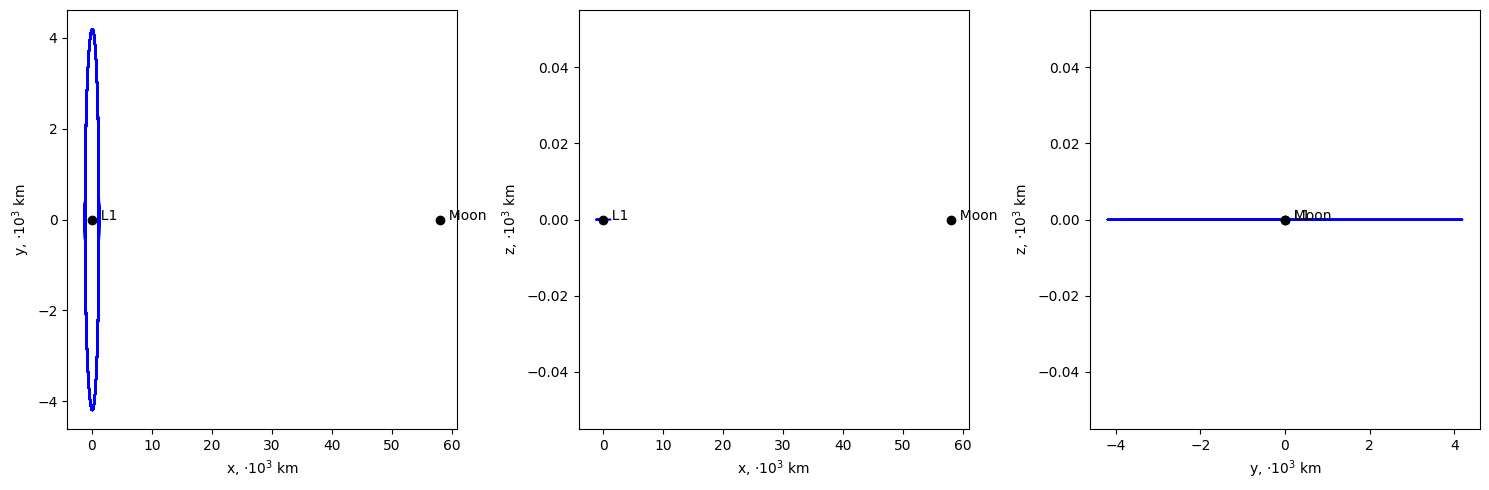

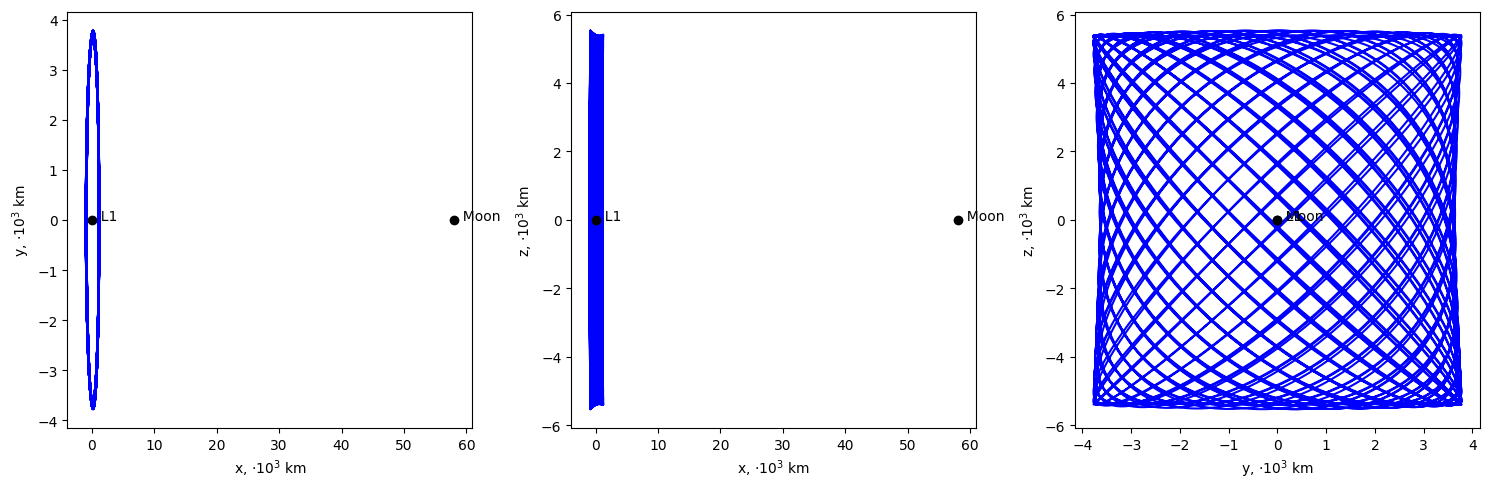

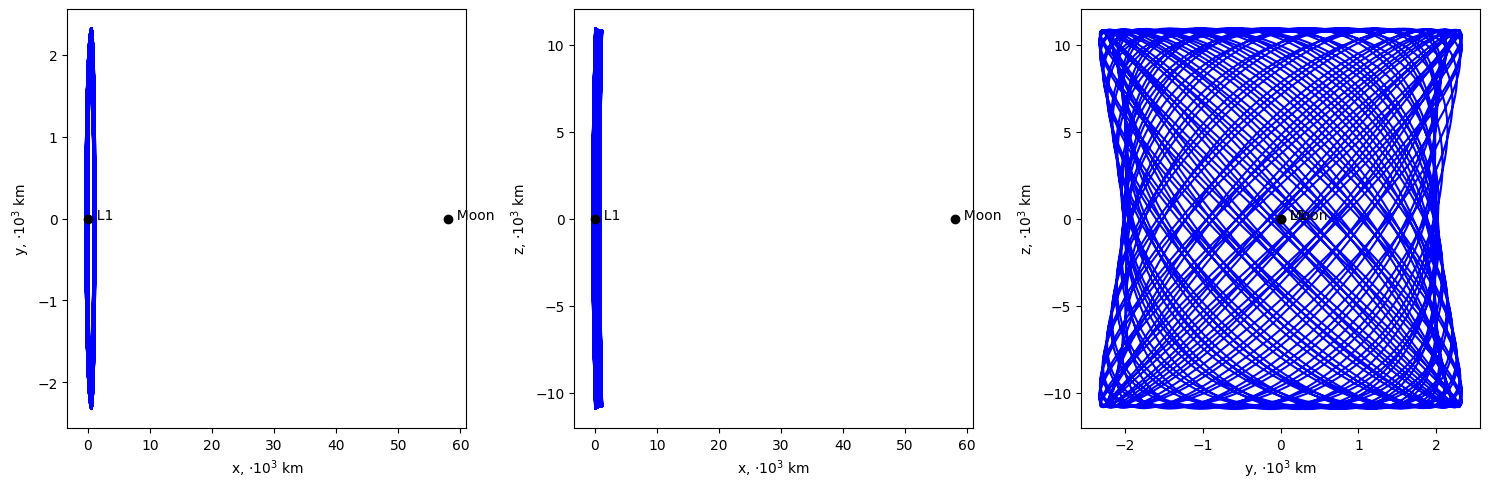

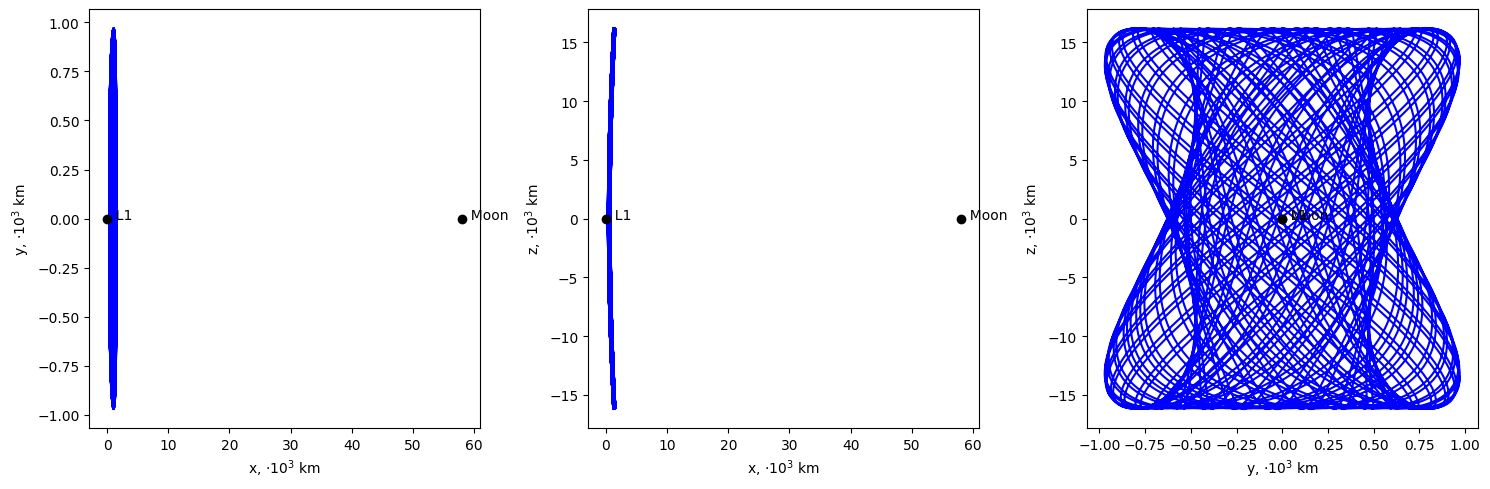

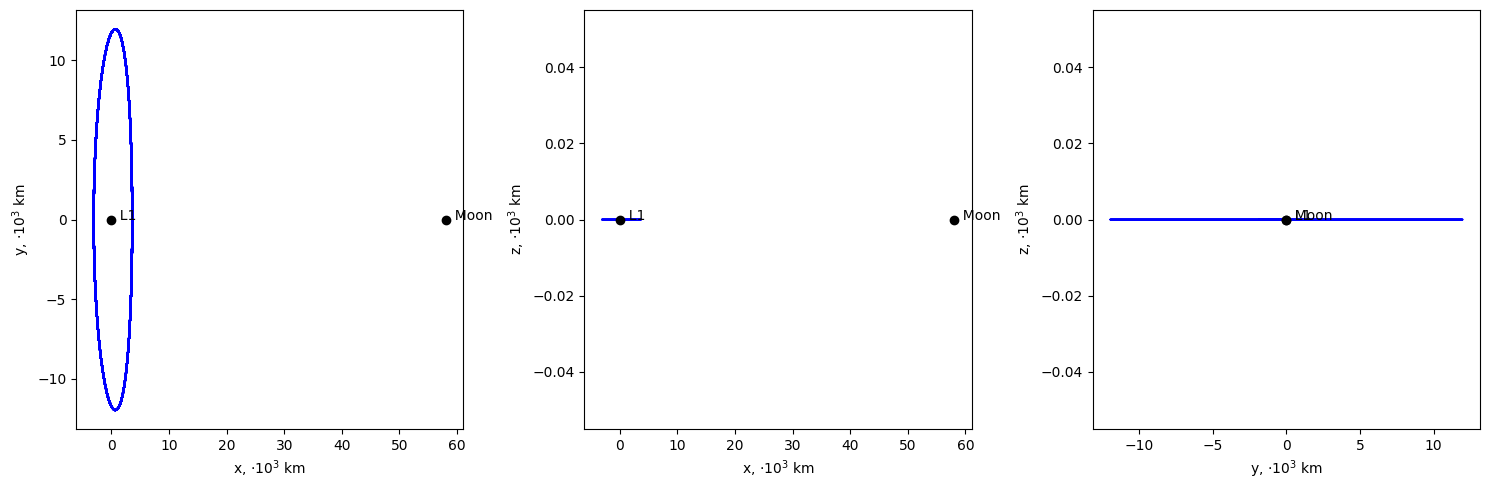

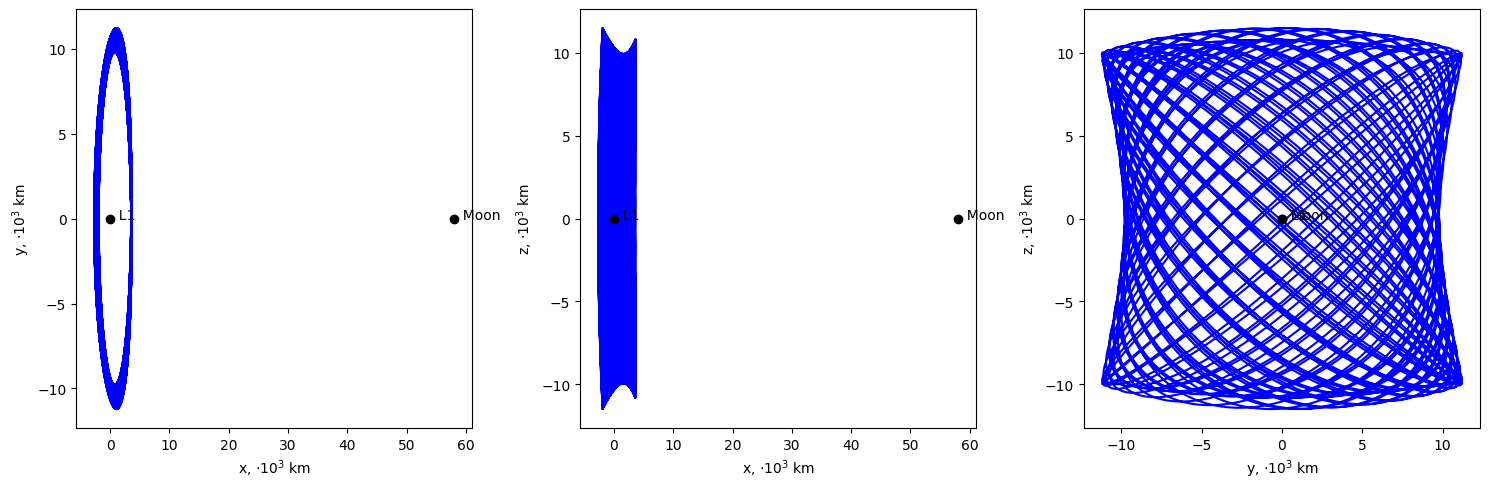

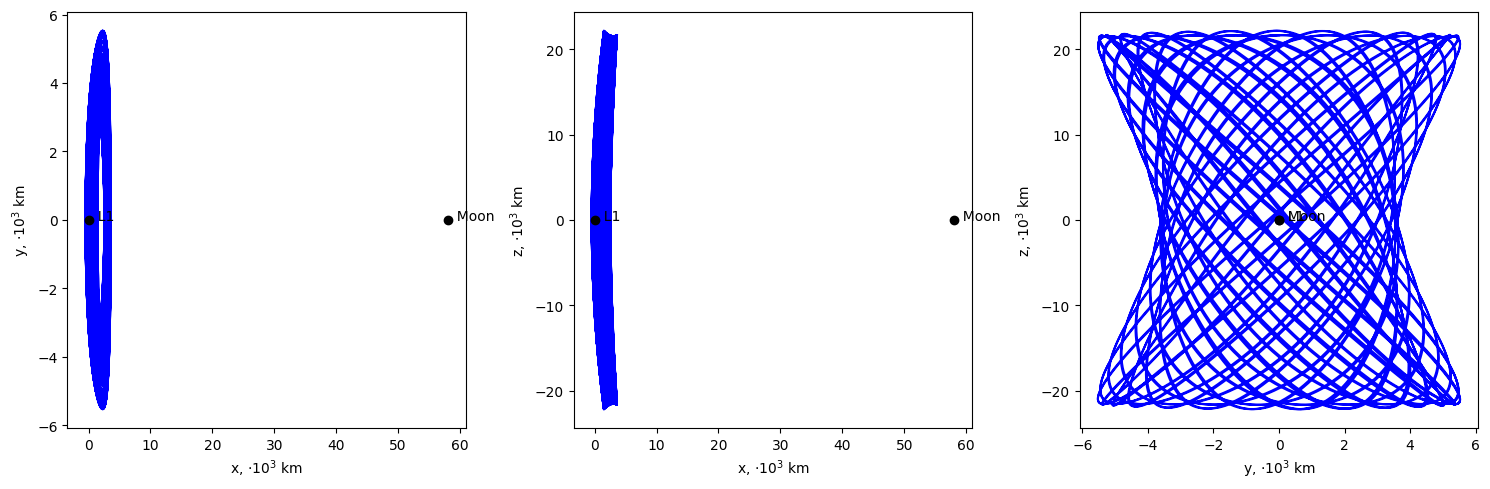

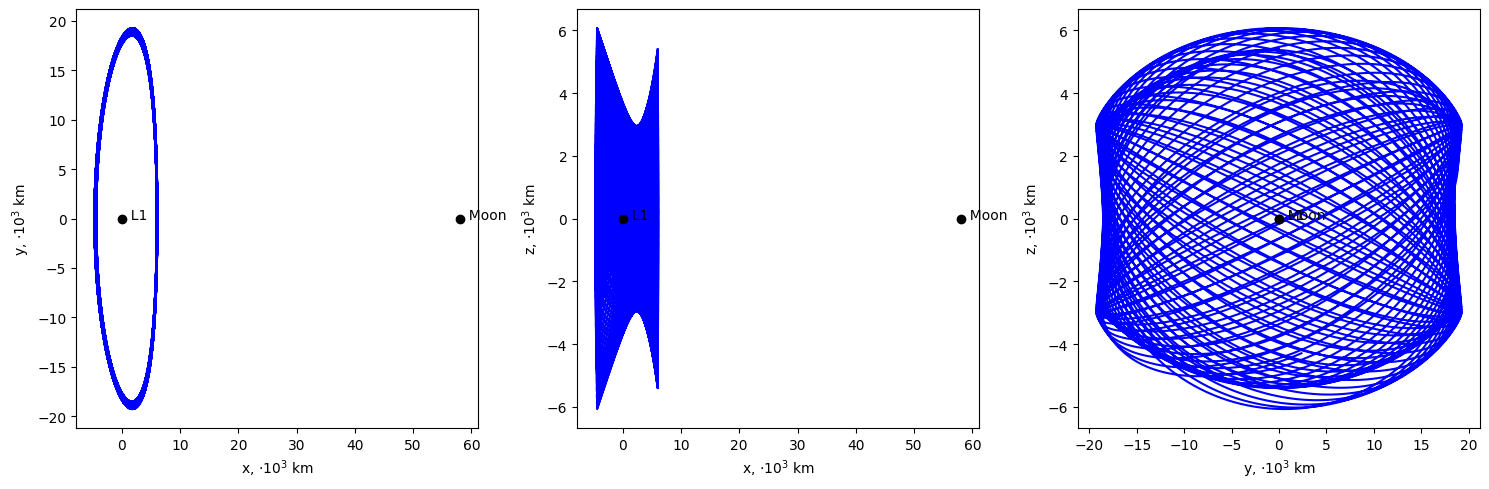

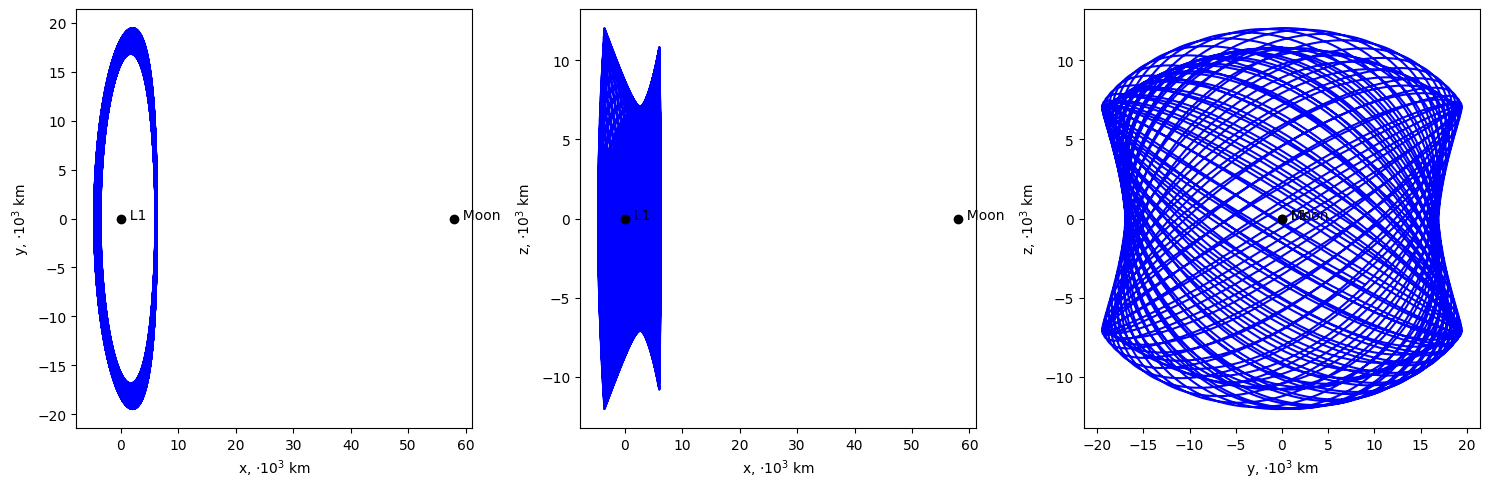

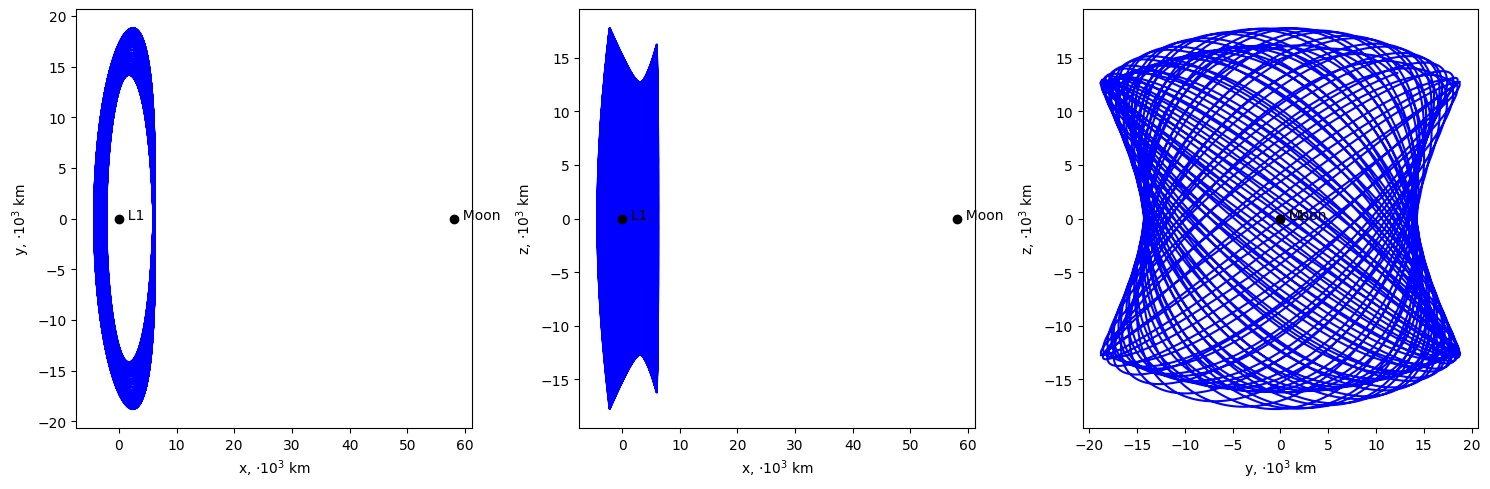

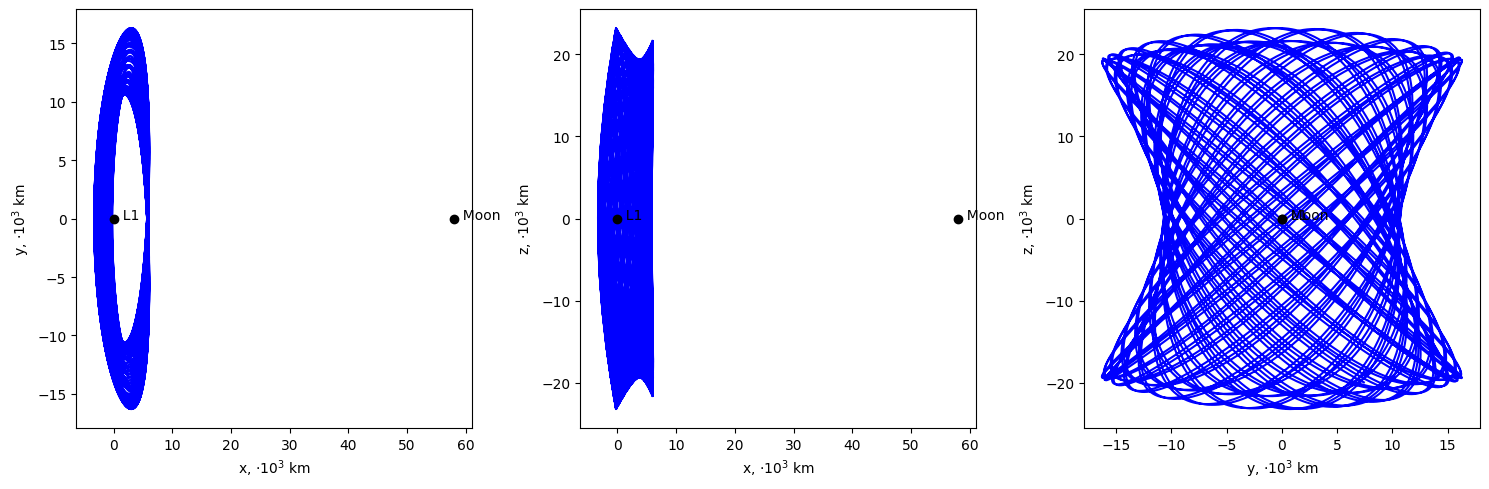

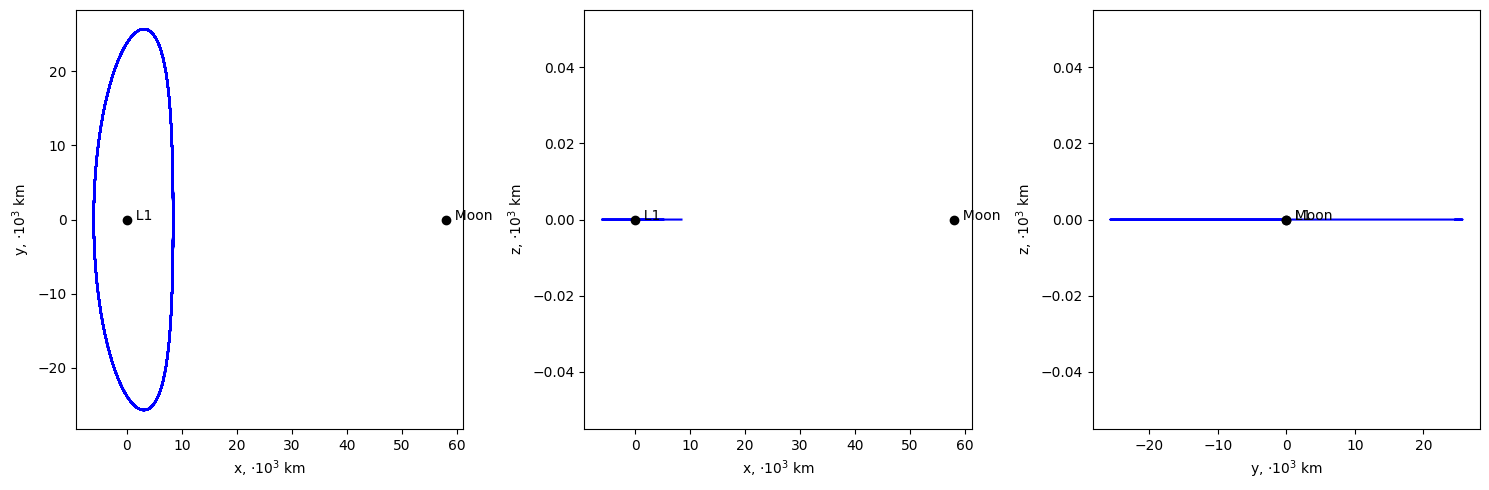

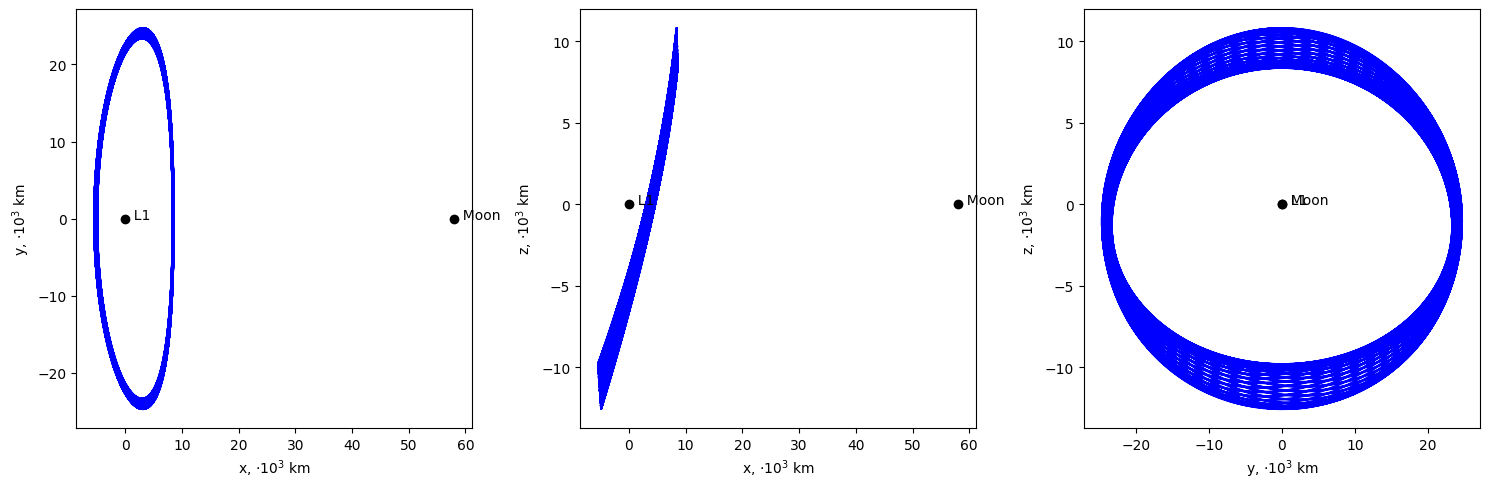

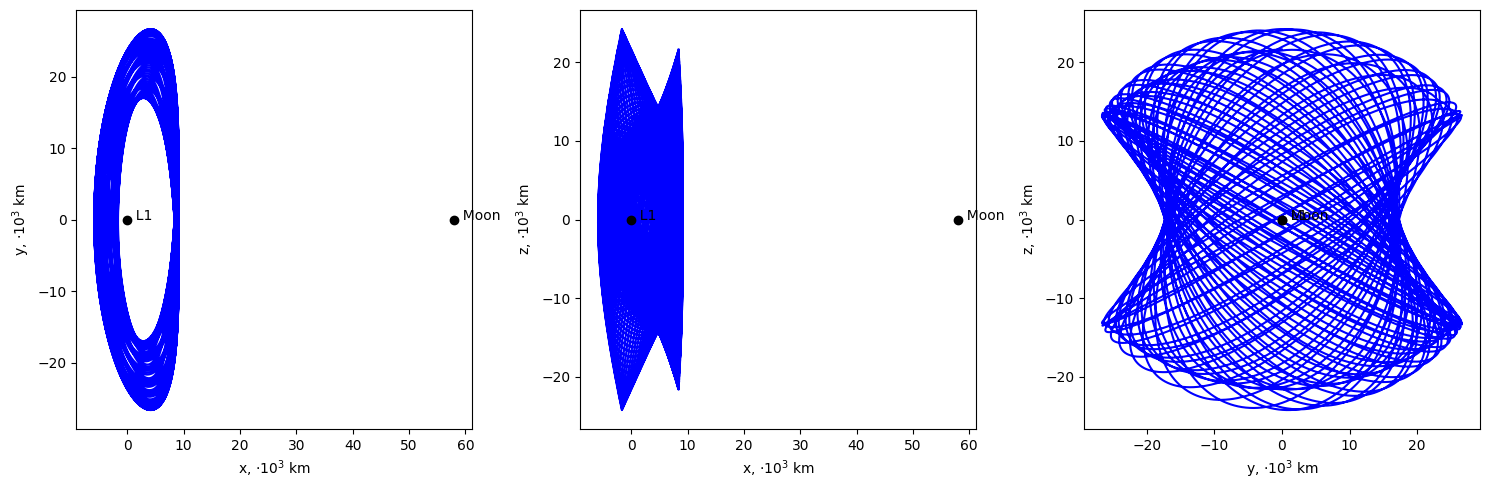

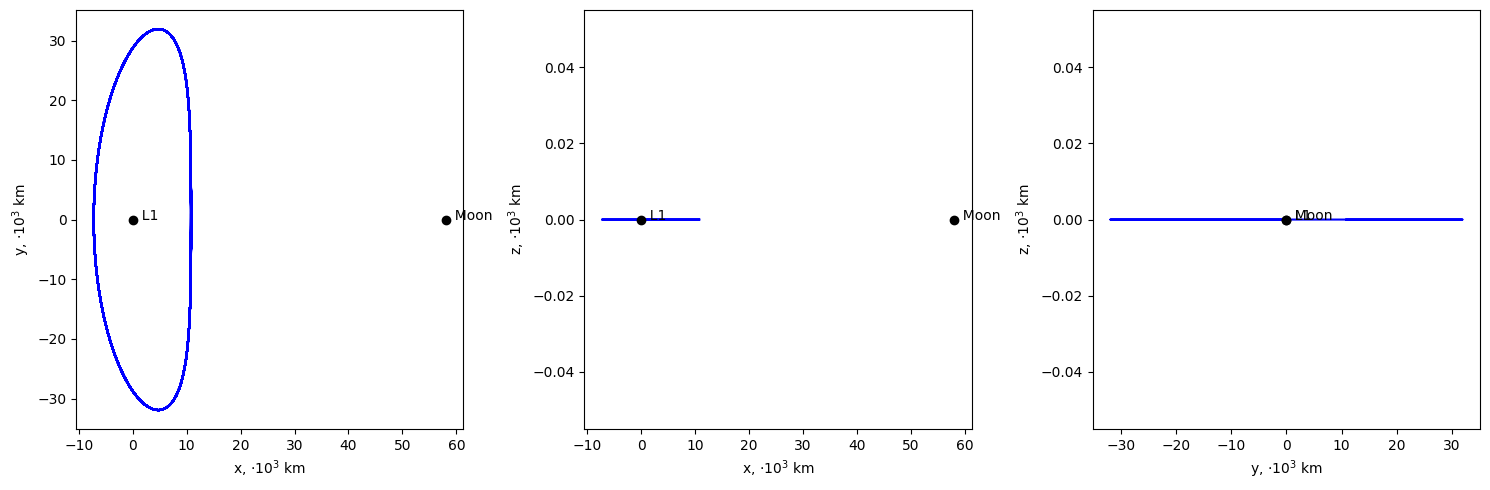

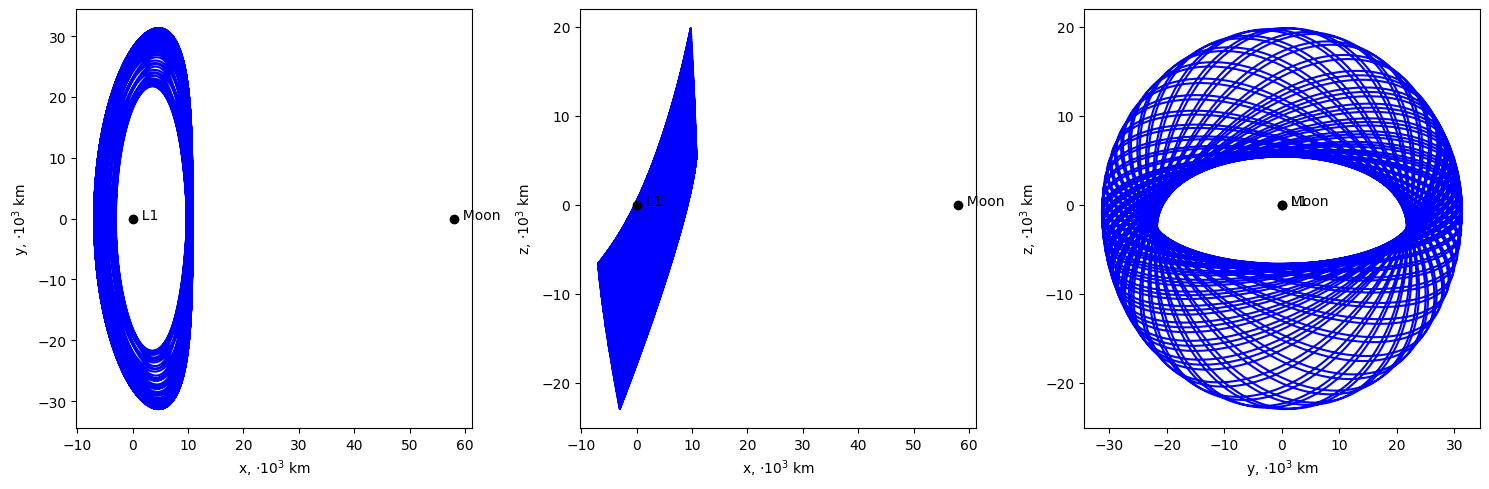

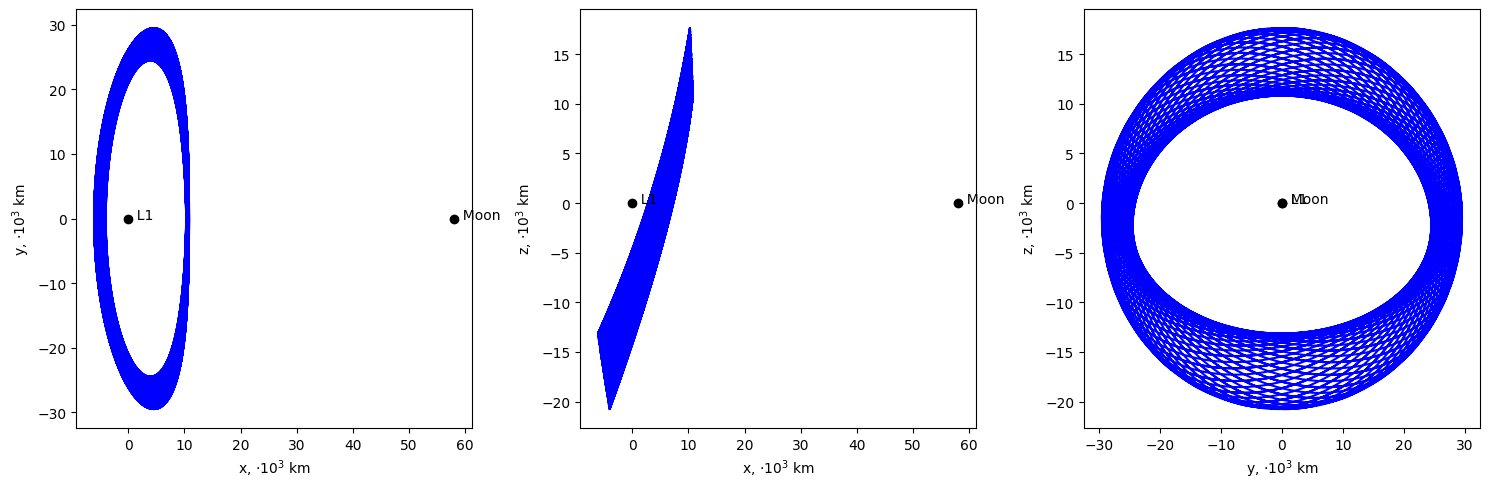

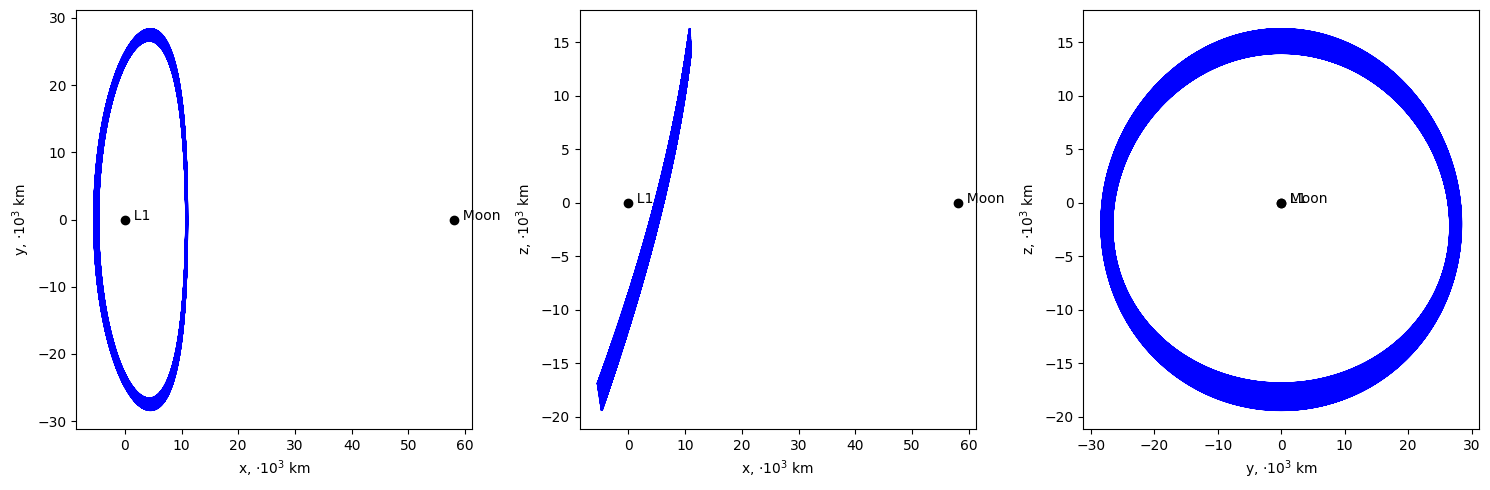

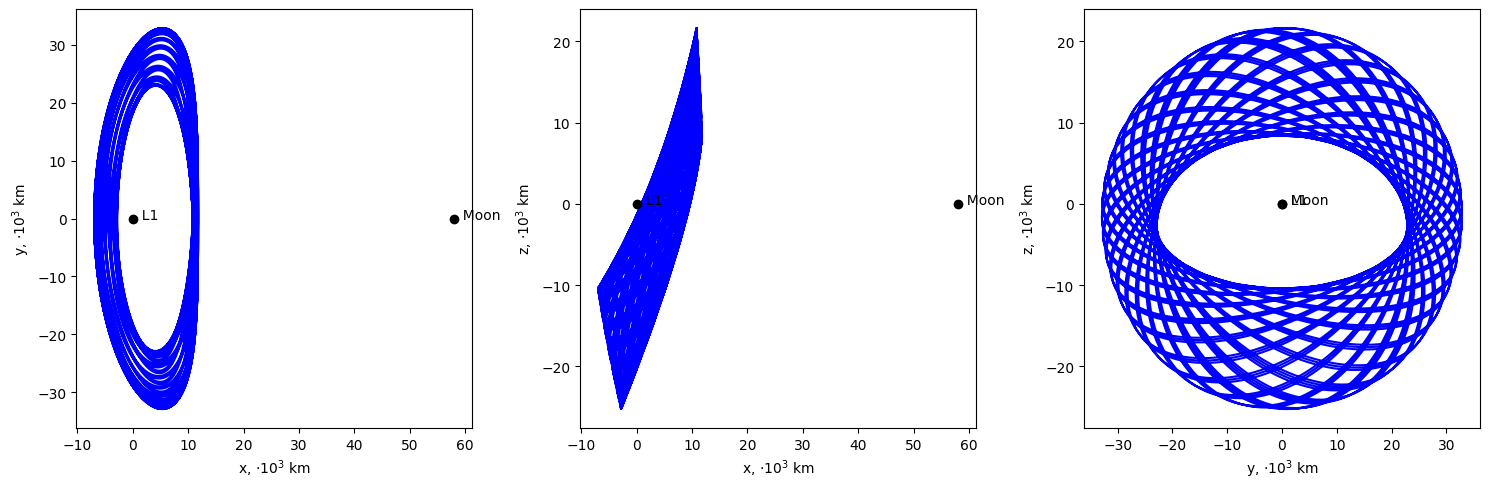

In [44]:
import os

directory = os.fsencode('../data/orbits')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    df = pd.read_csv(f'data/orbits/{filename}')
    plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
    ax = plotter.plot_proj(df, centers={'x':model.L1})
    plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')

In [40]:
valid_data_1, invalid_data_1 = start_state_map(x_axis, z_axis, left, right, model, 2 * 50, '../data/orbits/1/')


Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8087541732520093 0.0
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8087541732520093 0.014062193143234616
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8087541732520093 0.02812438628646923
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8087541732520093 0.042186579429703844
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8087541732520093 0.05624877257293846
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8150040368712247 0.0
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8150040368712247 0.014062193143234616
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8150040368712247 0.02812438628646923
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8150040368712247 0.042186579429703844
Simple station-keeping: 0 Delta-v (1.000000) > maxdv (0.000000)
0.8150040368712247 0.0562487725729384

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: dopri5: problem is probably stiff (interrupted)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


Borders unreachable
0.82125390049044 0.0
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.82125390049044 0.014062193143234616
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.82125390049044 0.02812438628646923
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 

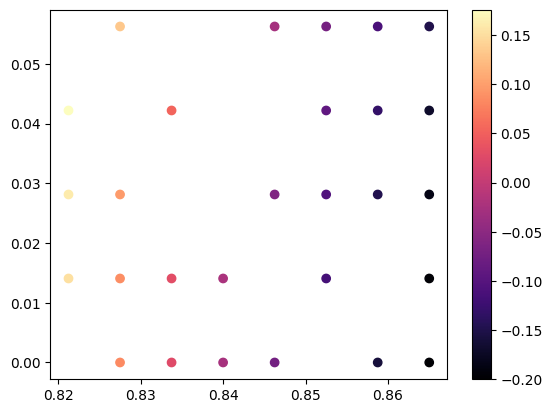

In [41]:
import matplotlib.pyplot as plt

start_state_array_1 = np.array(valid_data_1)
plt.scatter(start_state_array_1[:,0], start_state_array_1[:,1], c=start_state_array_1[:,2], cmap='magma')
plt.colorbar()
plt.show()

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element 

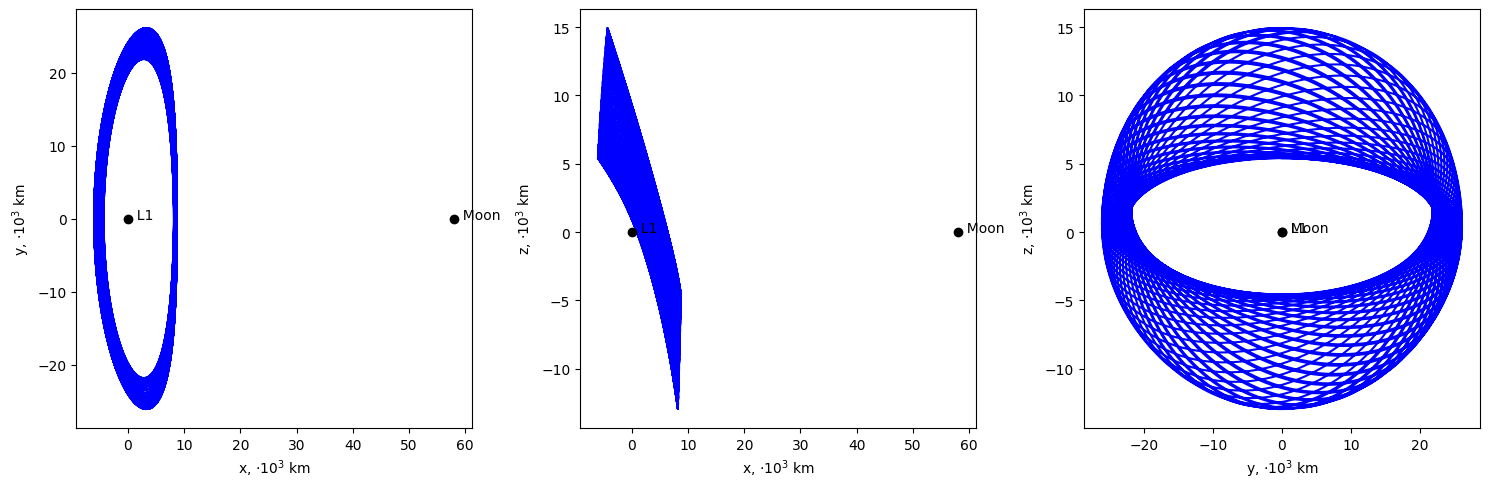

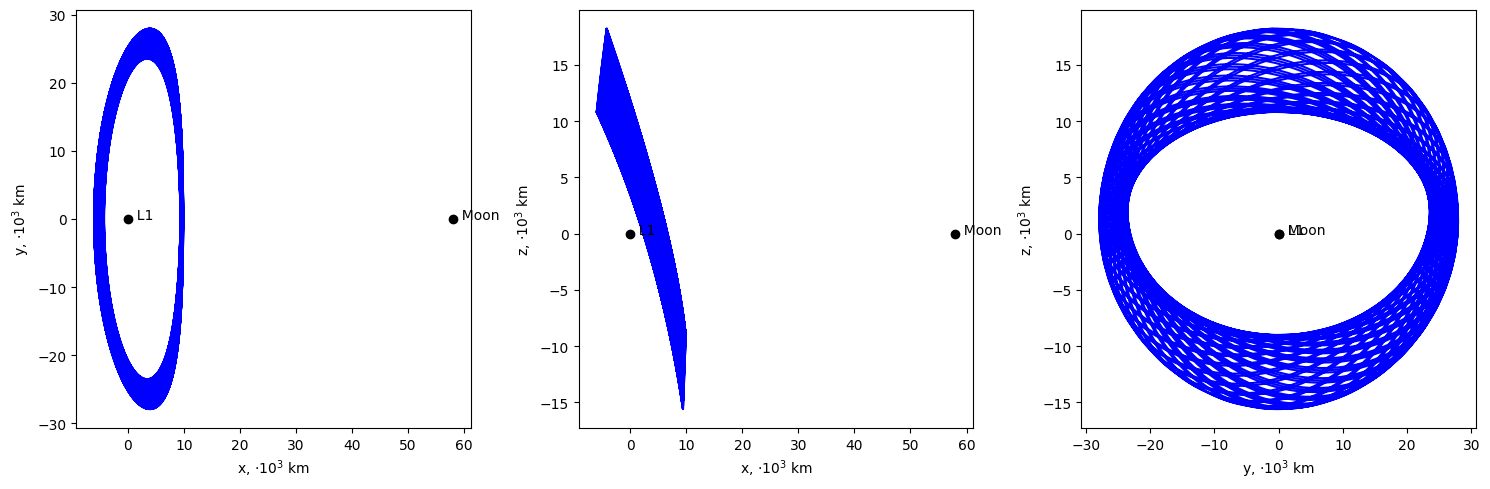

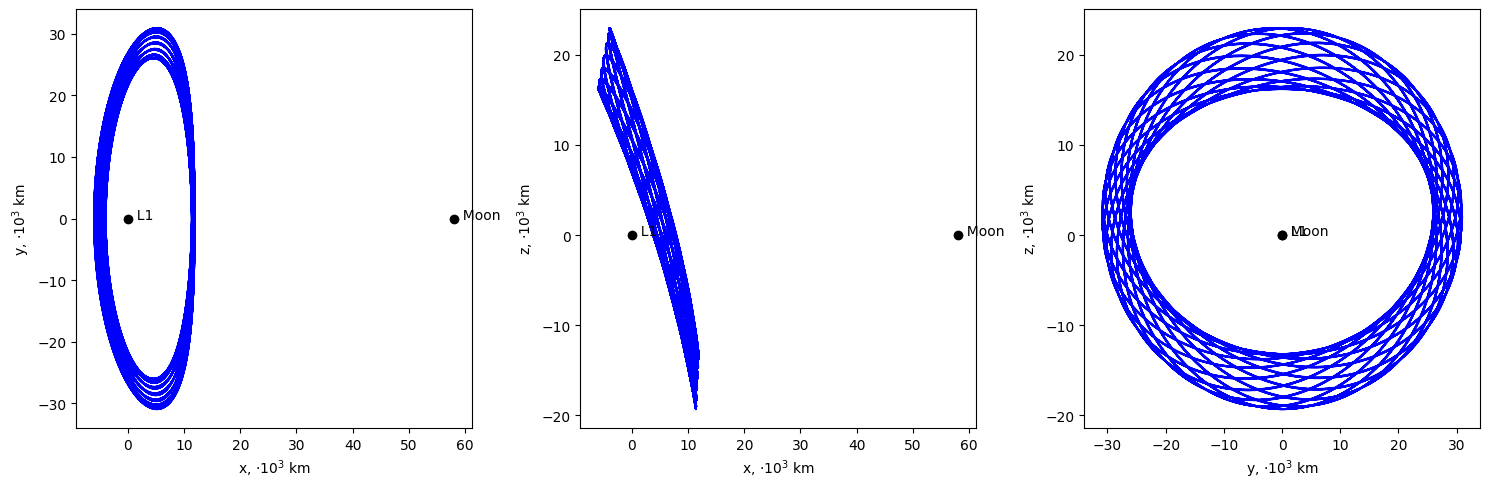

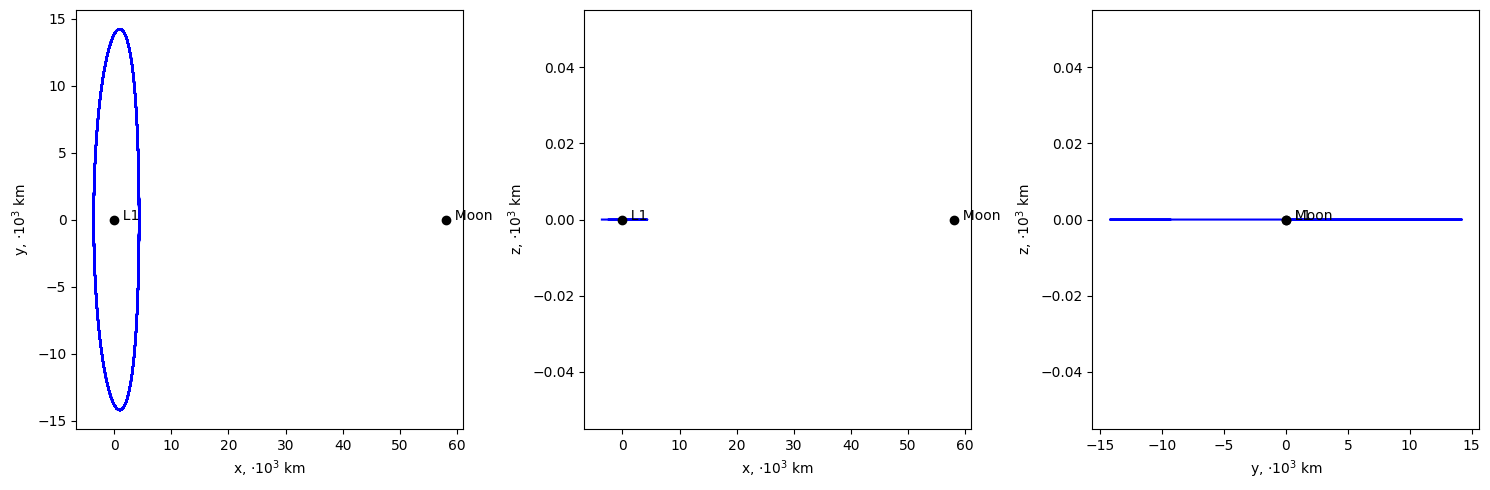

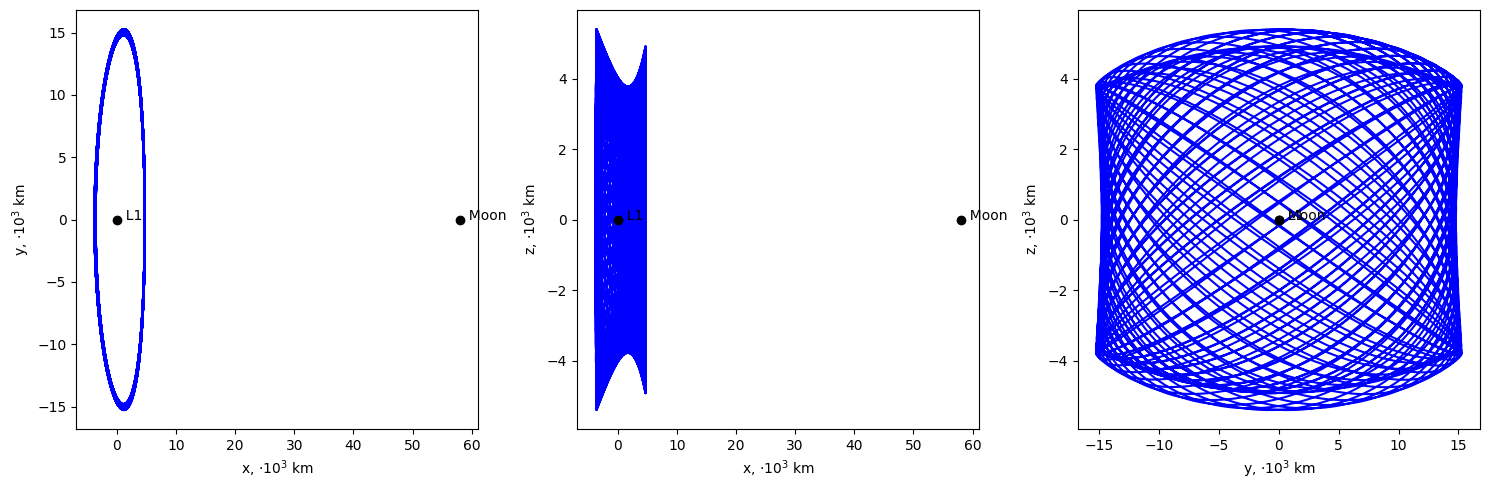

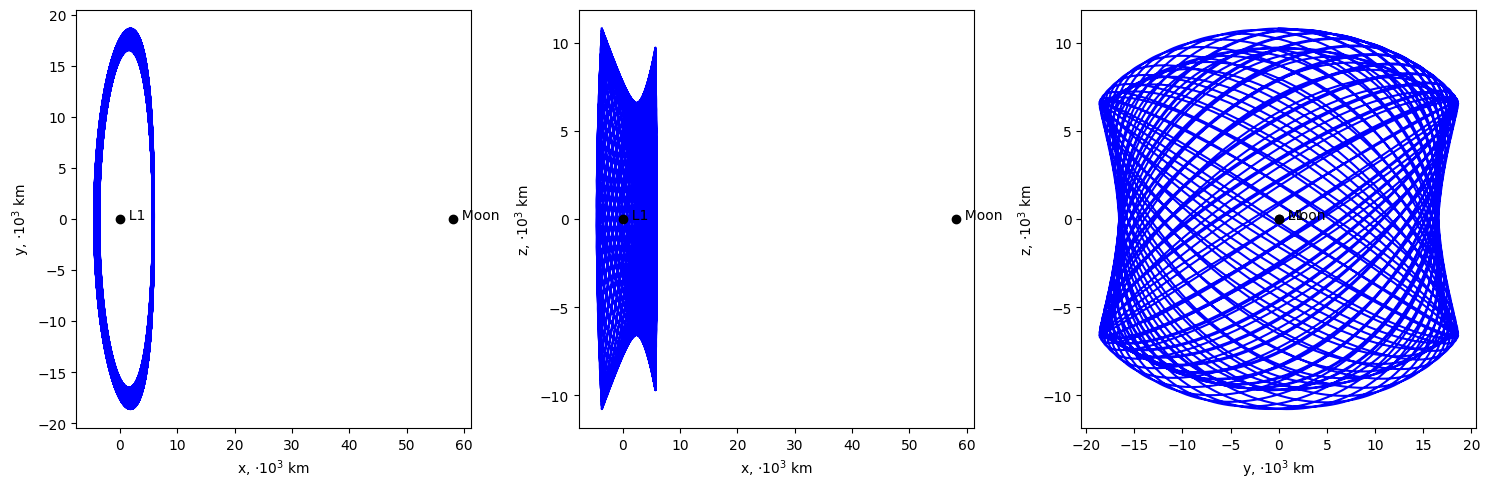

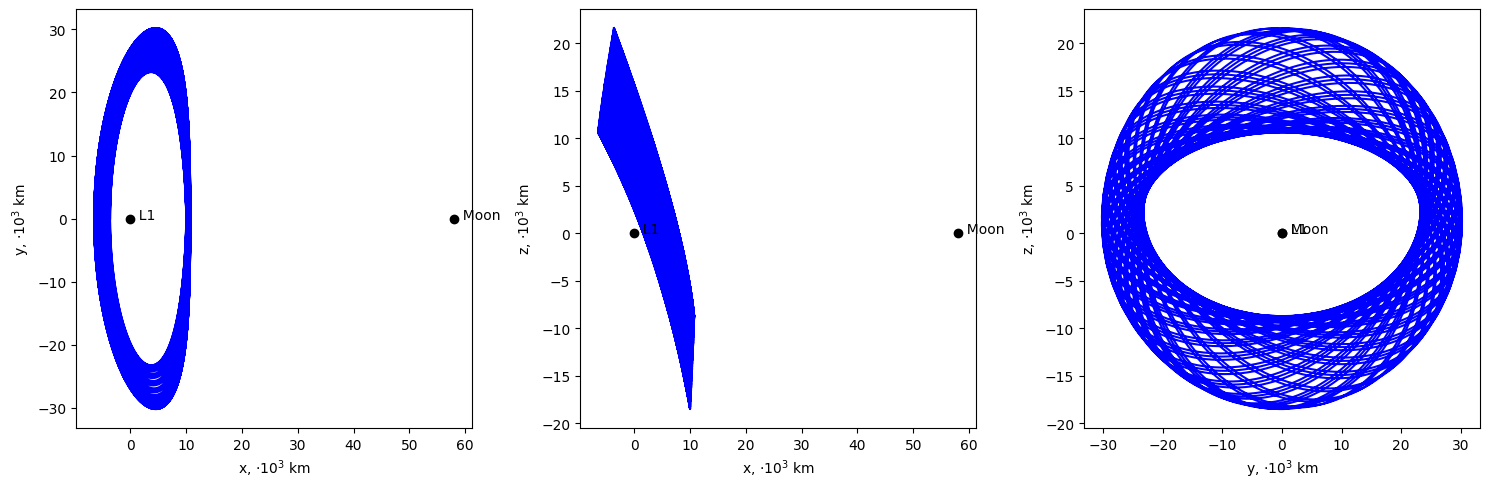

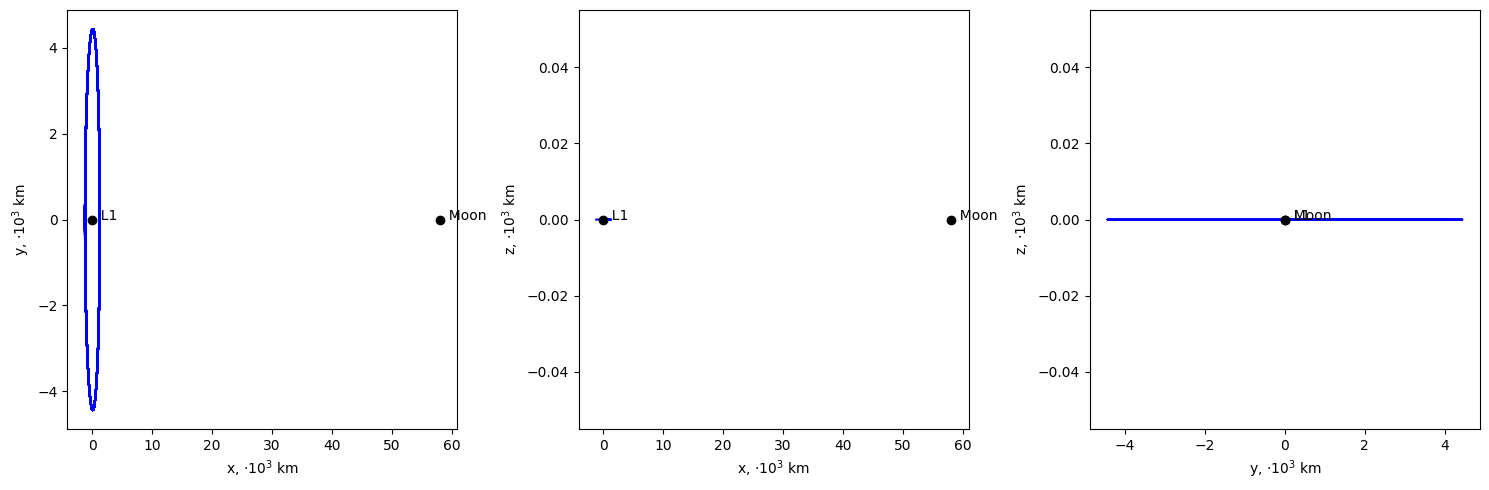

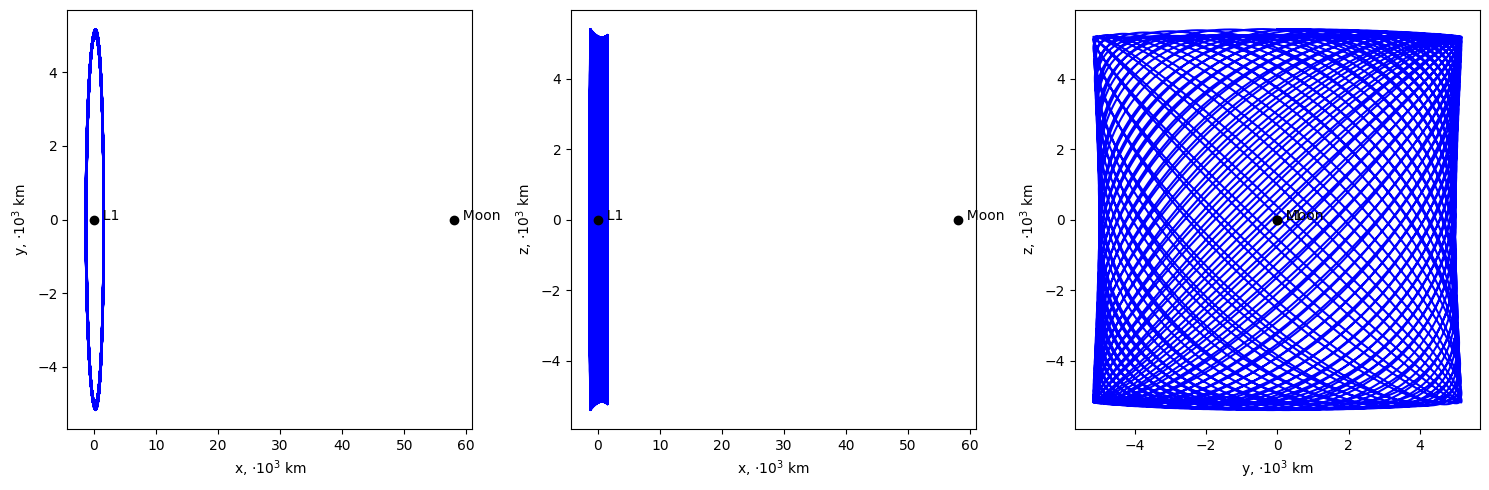

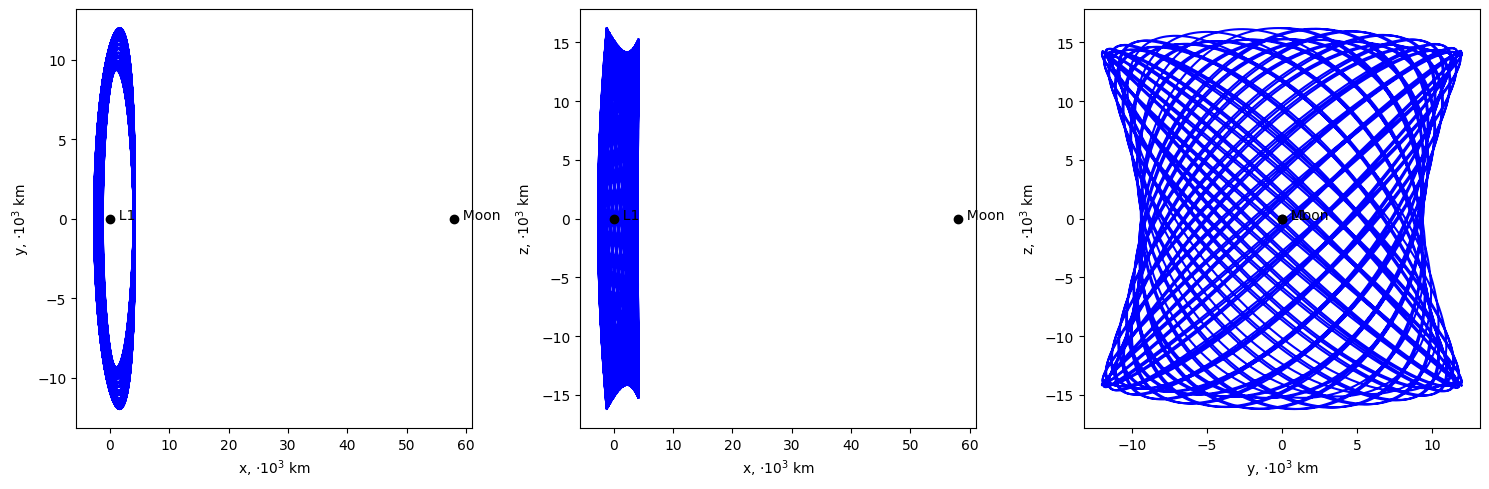

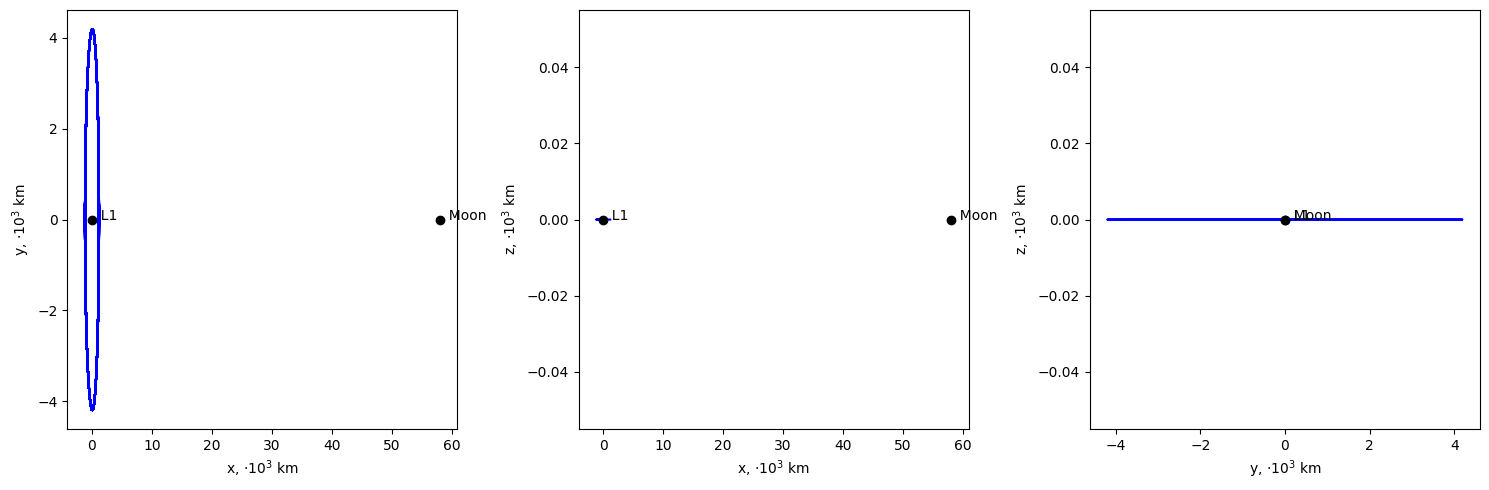

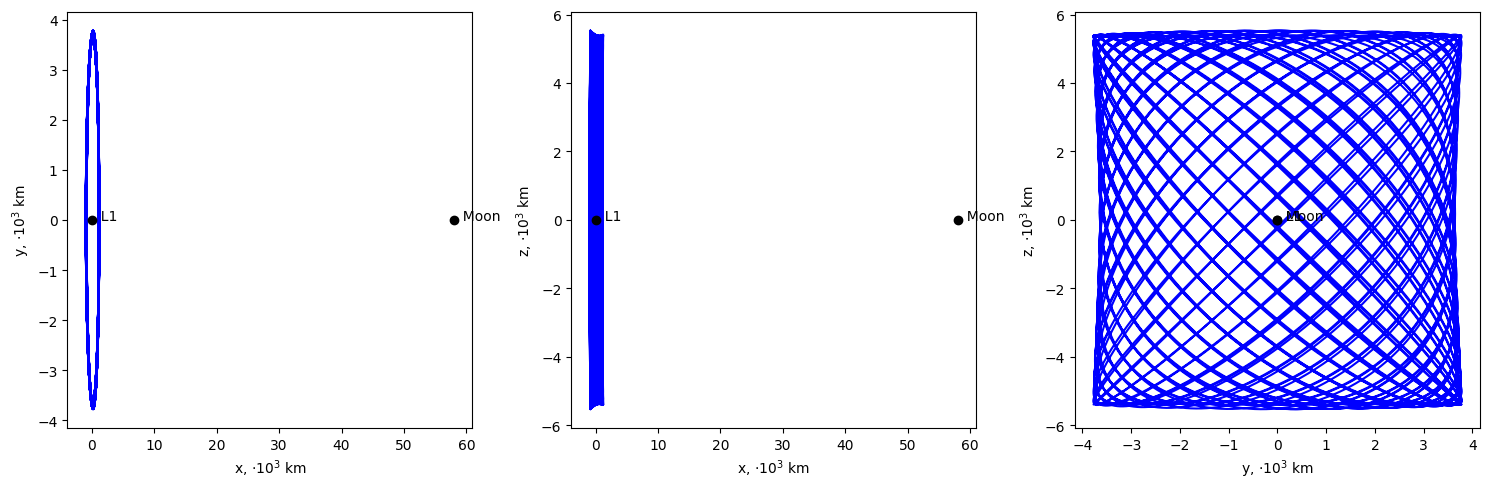

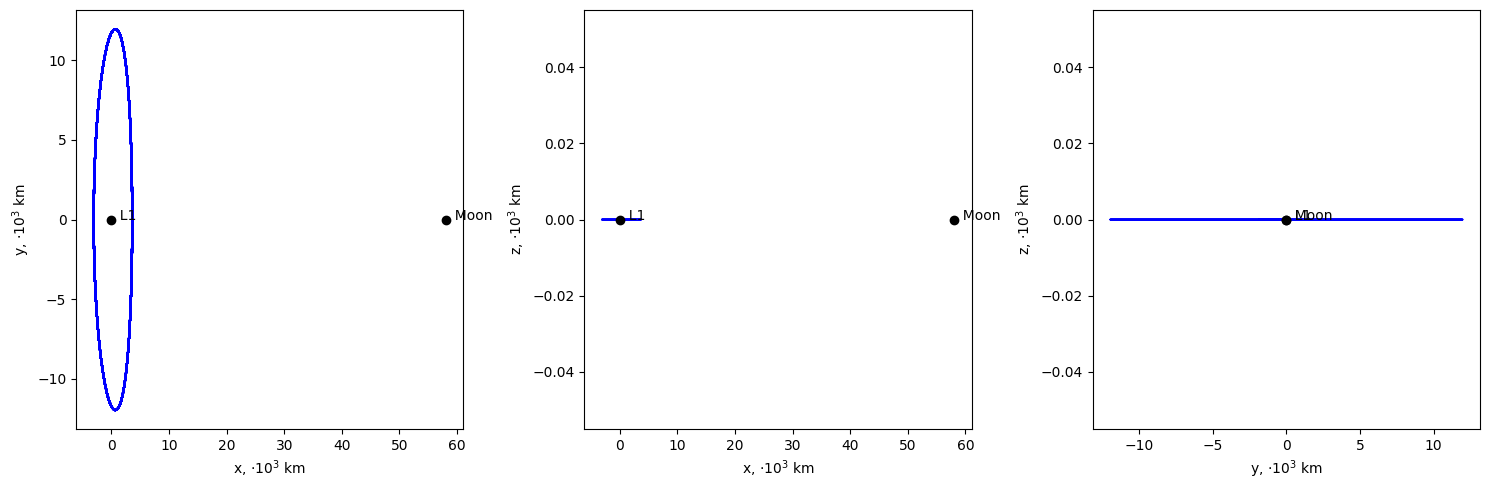

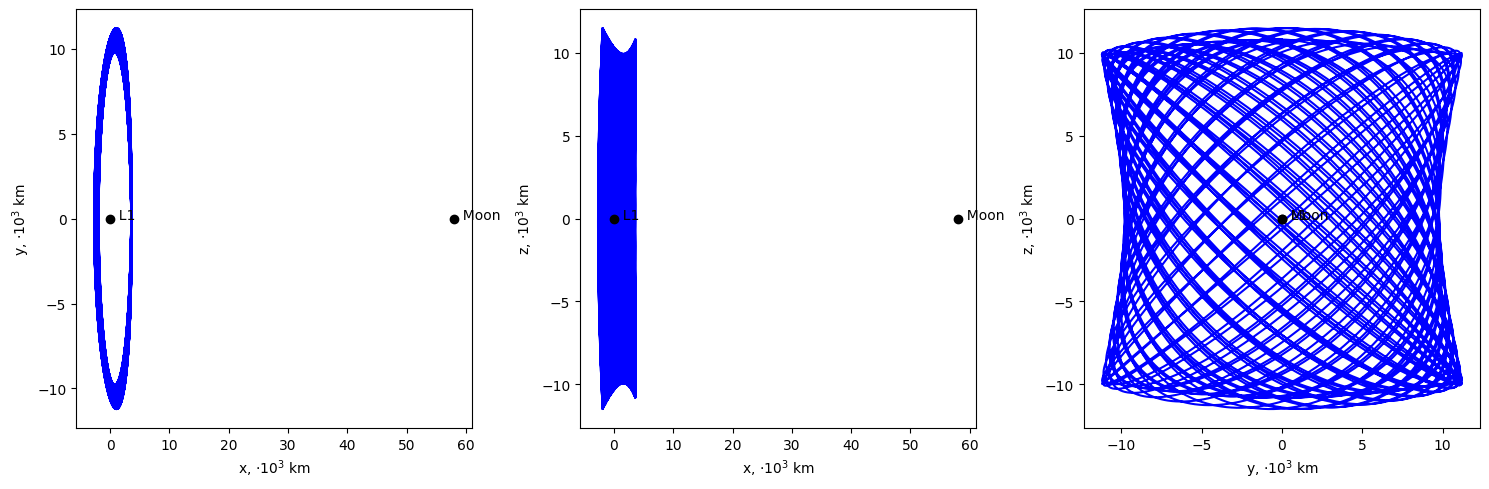

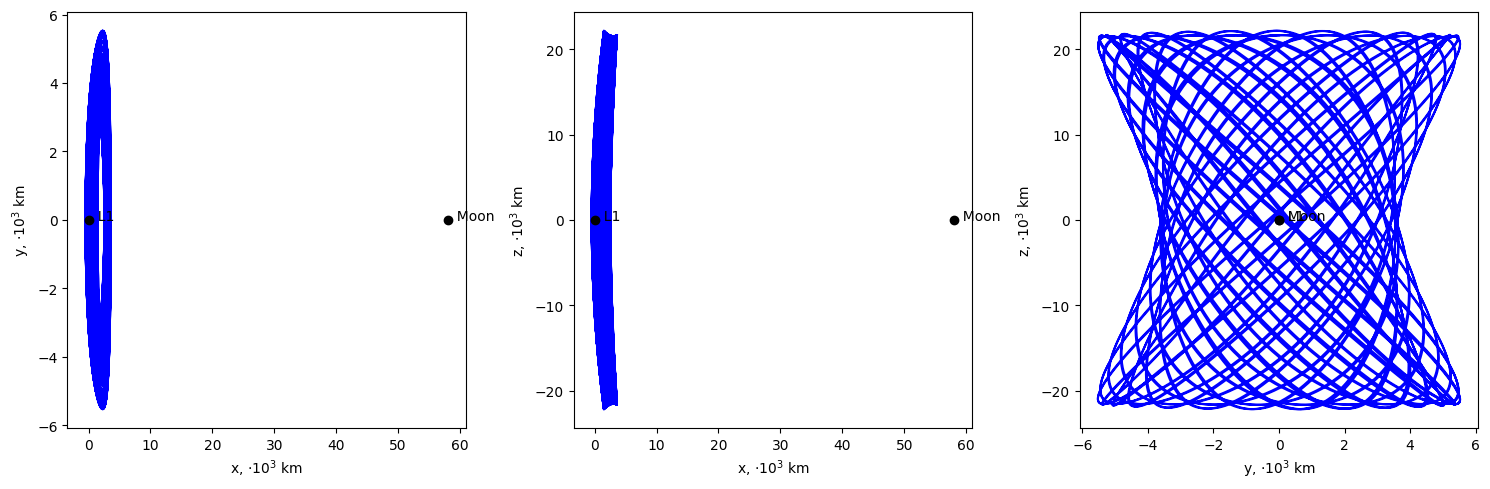

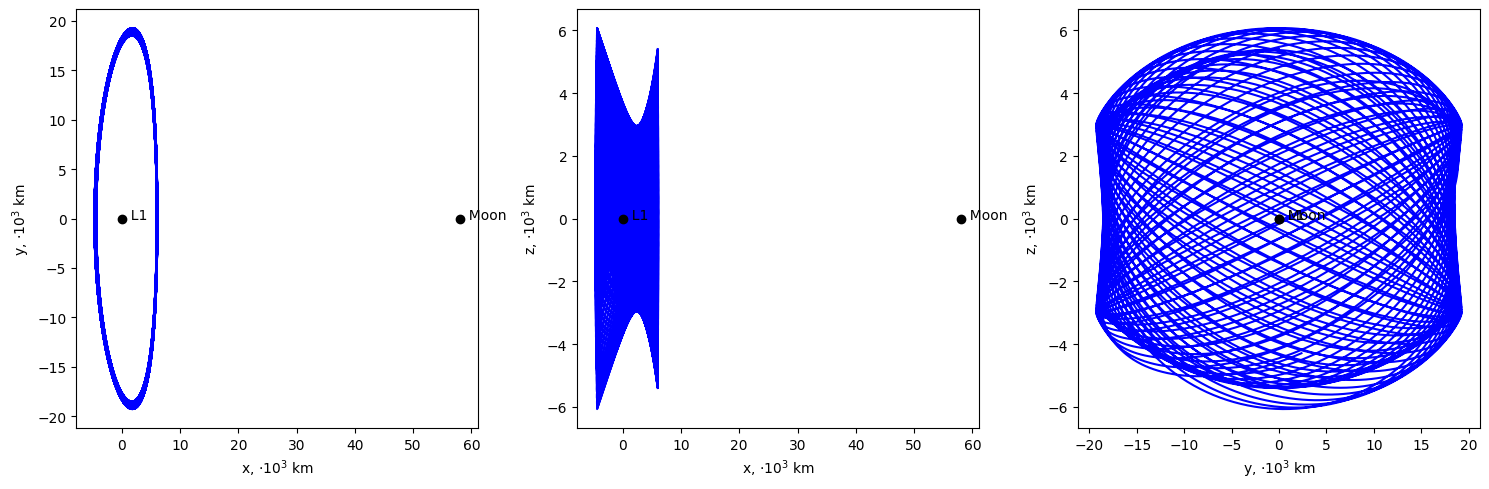

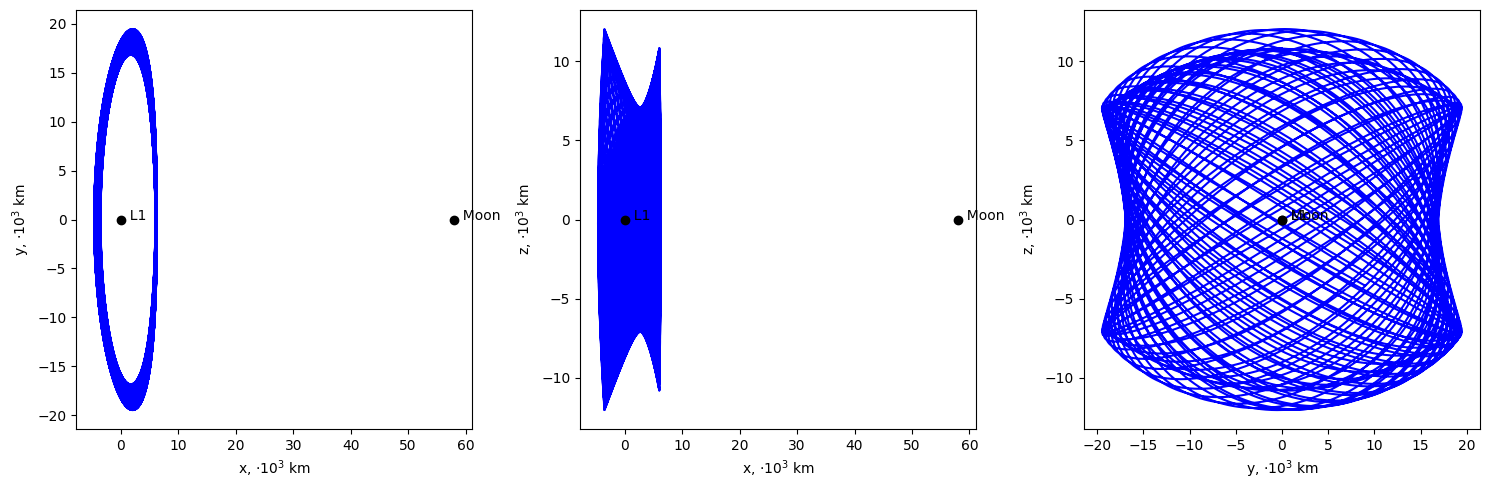

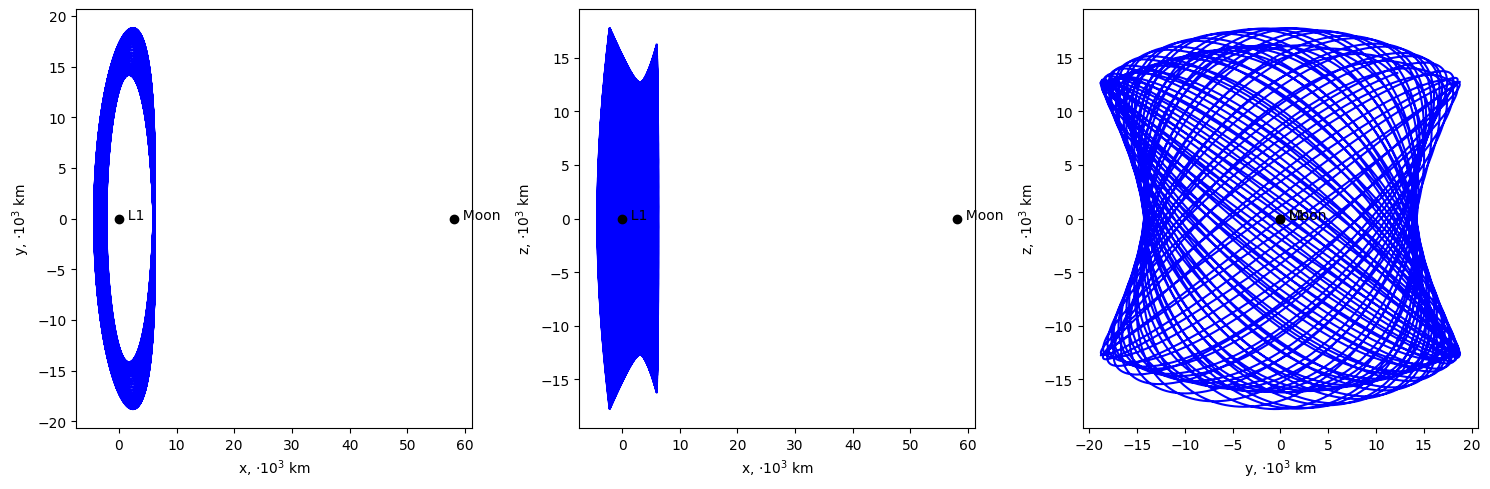

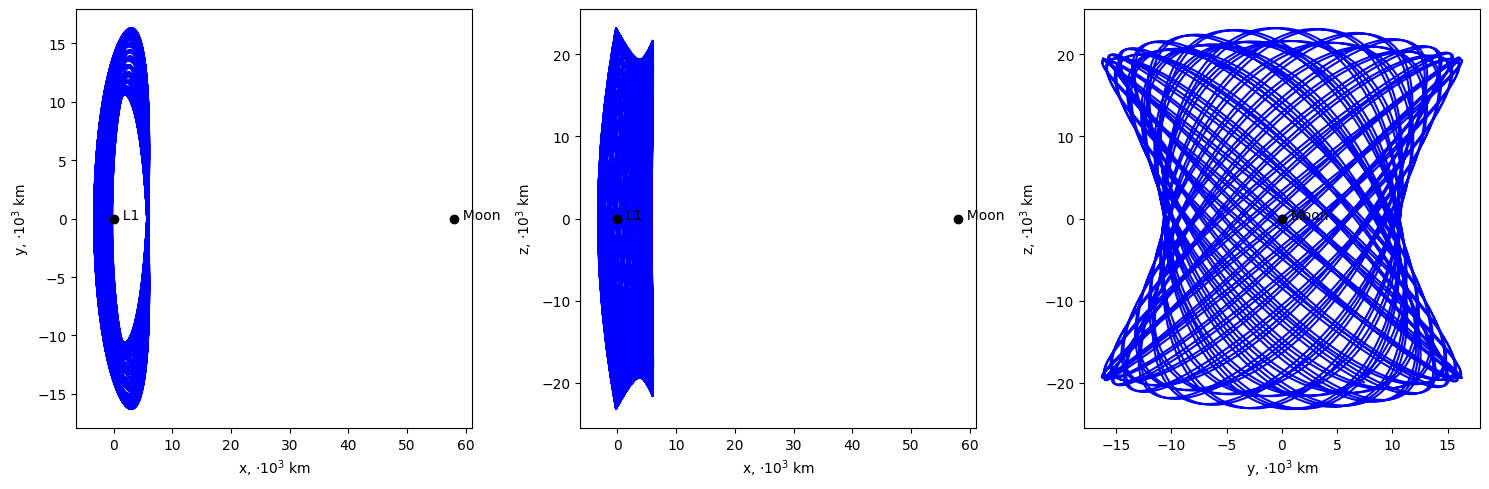

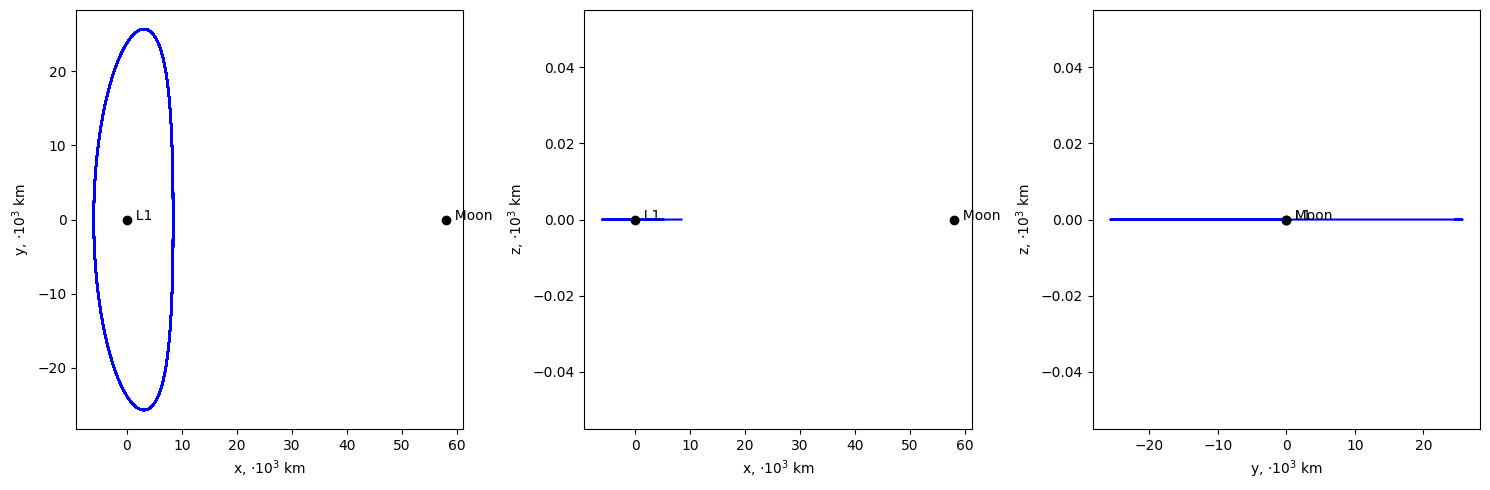

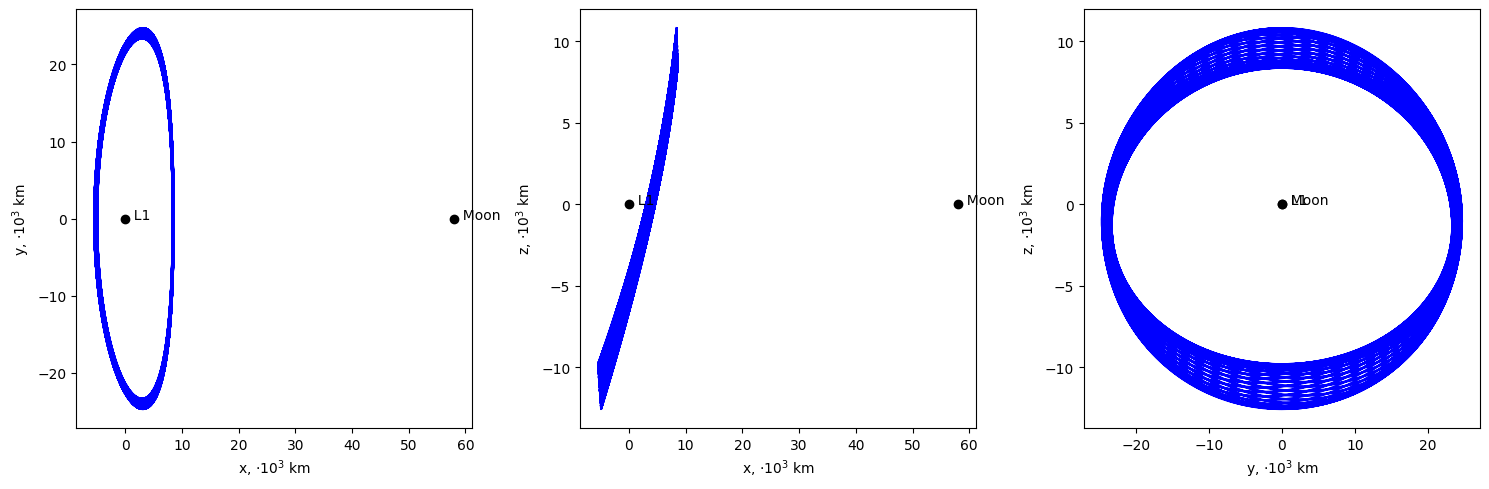

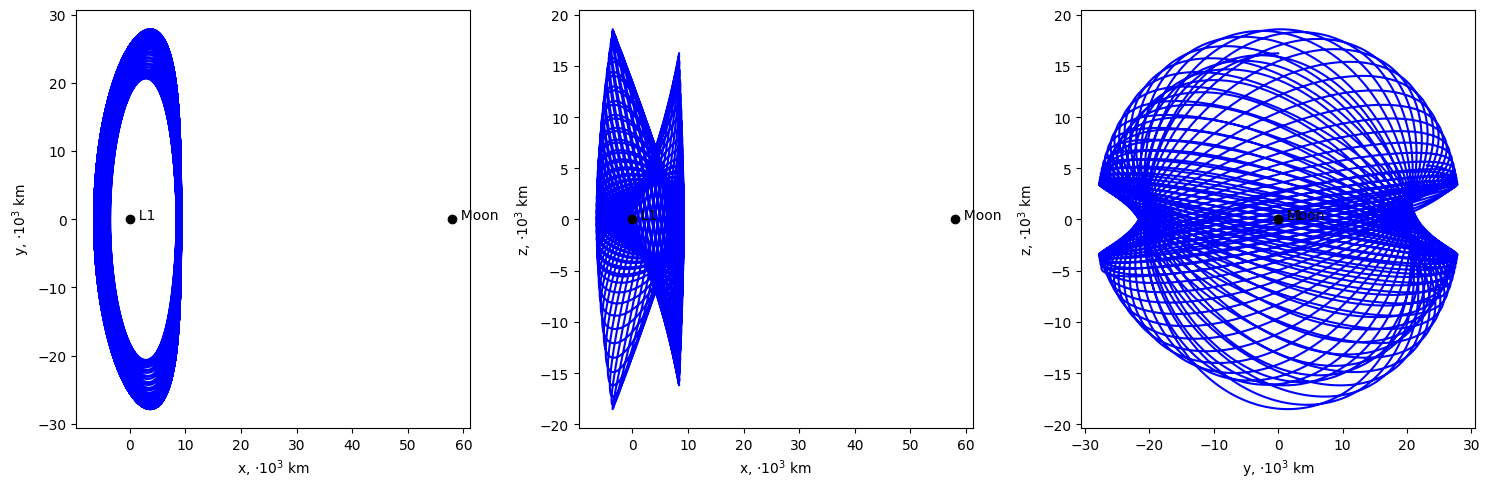

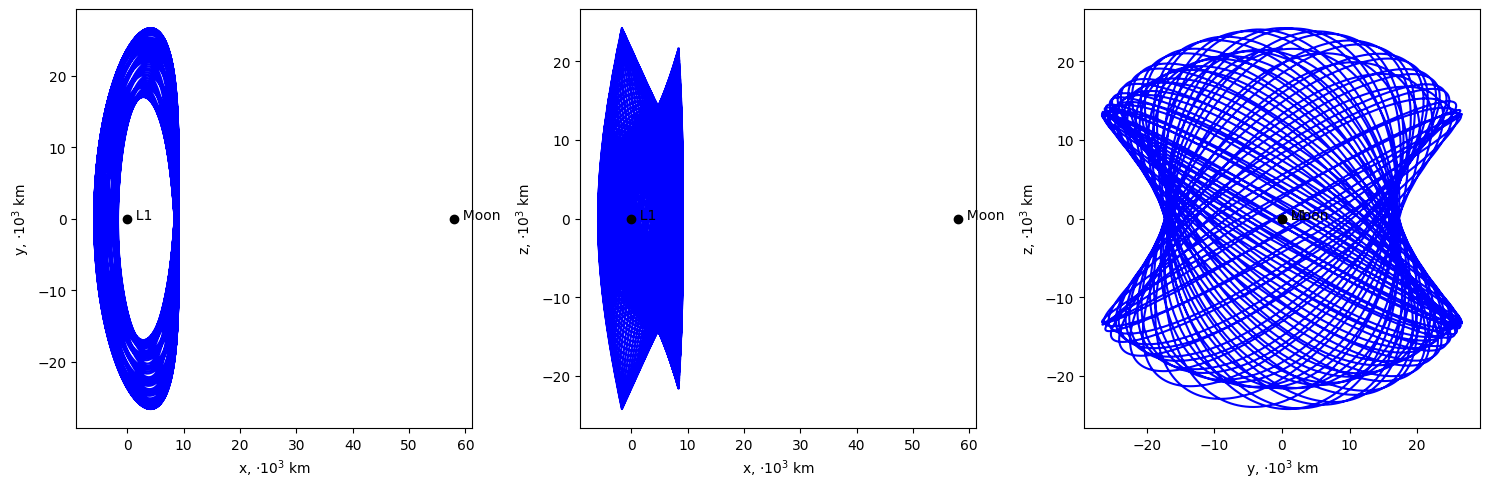

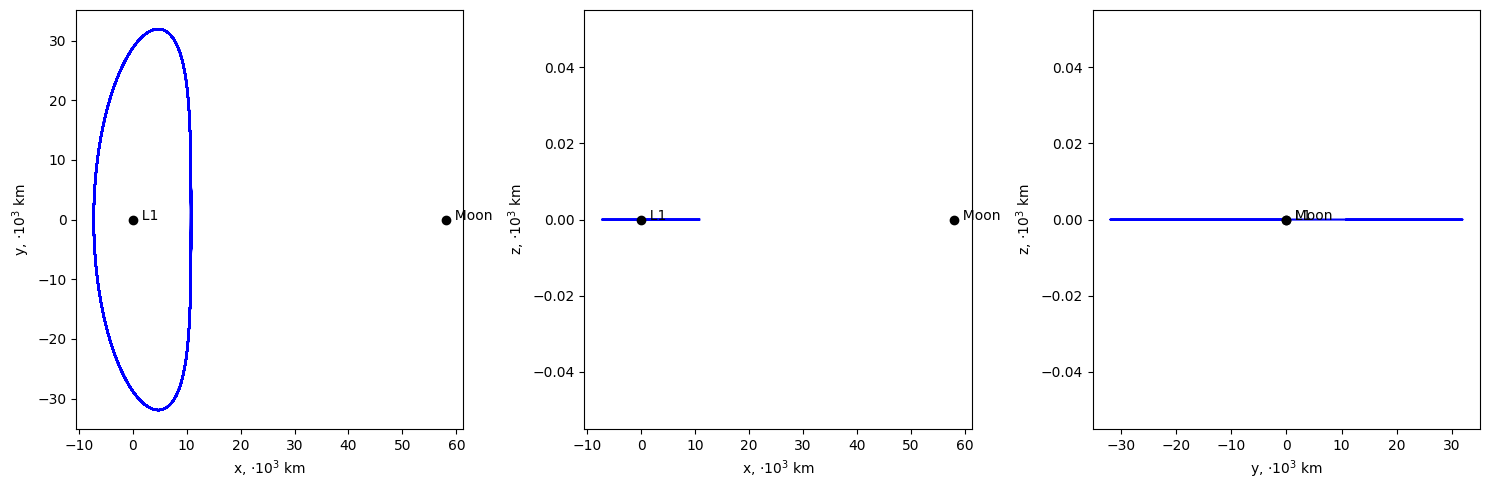

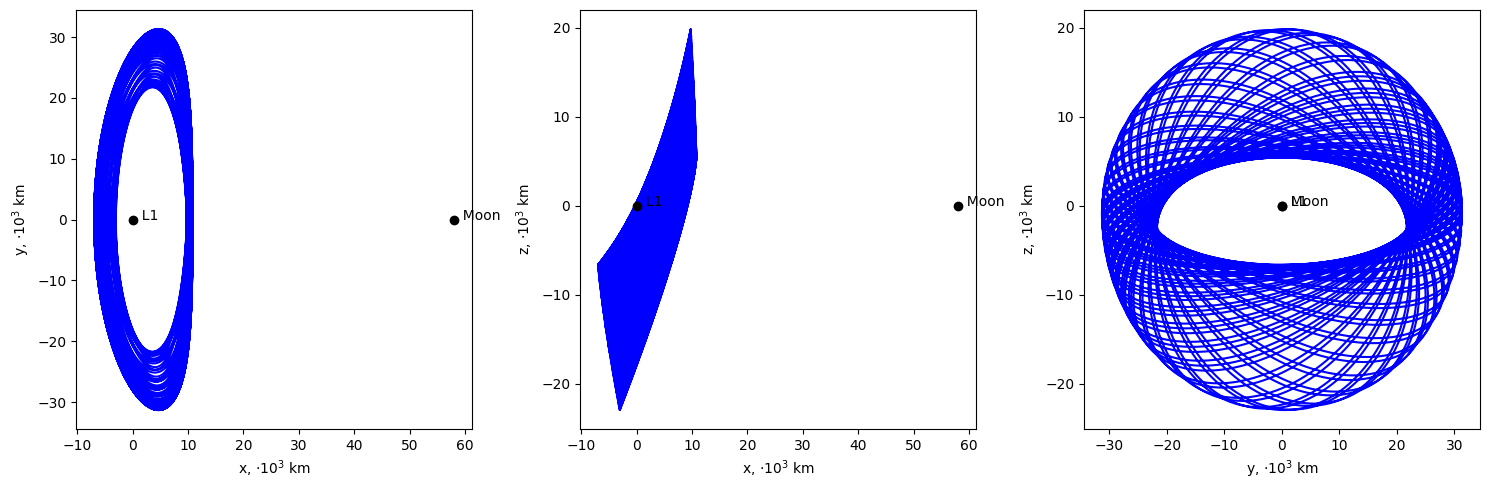

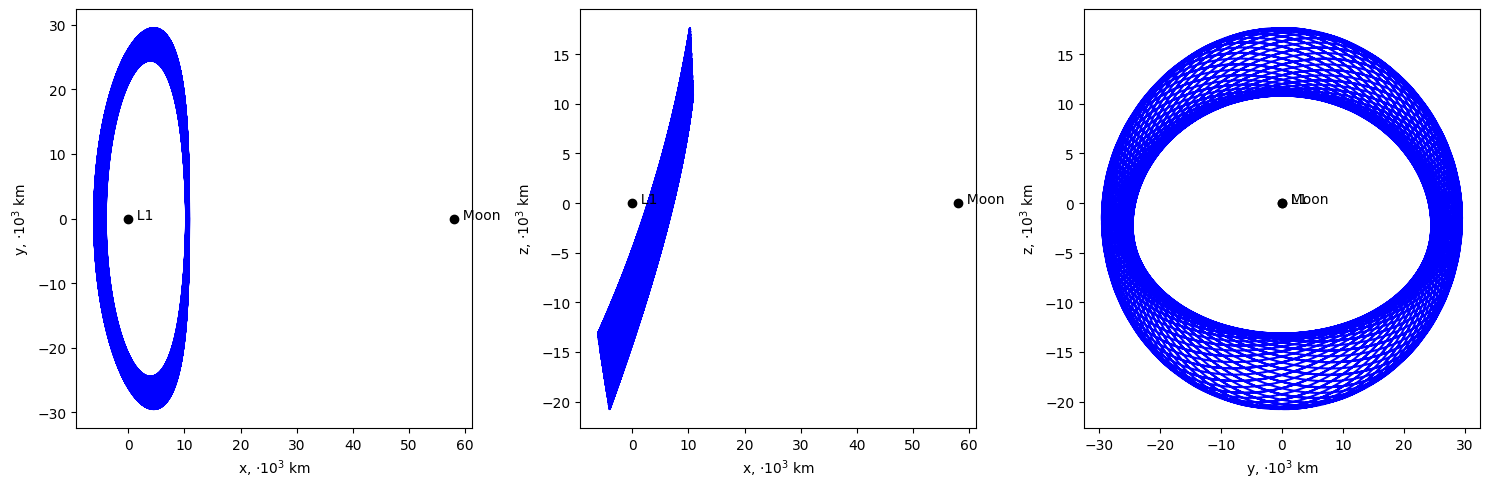

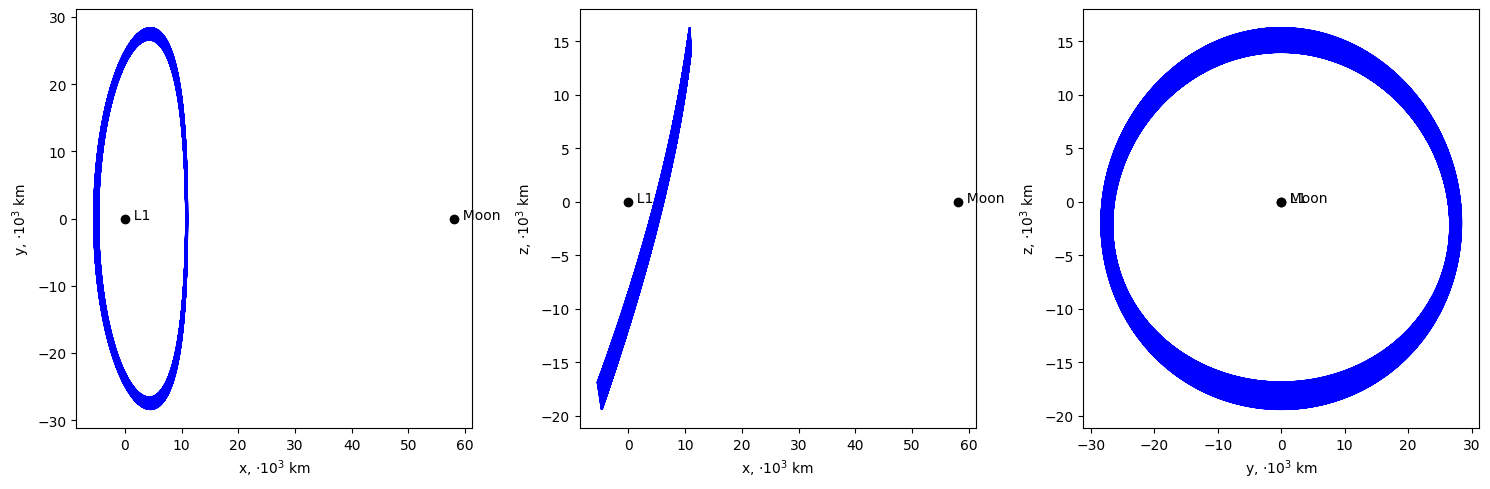

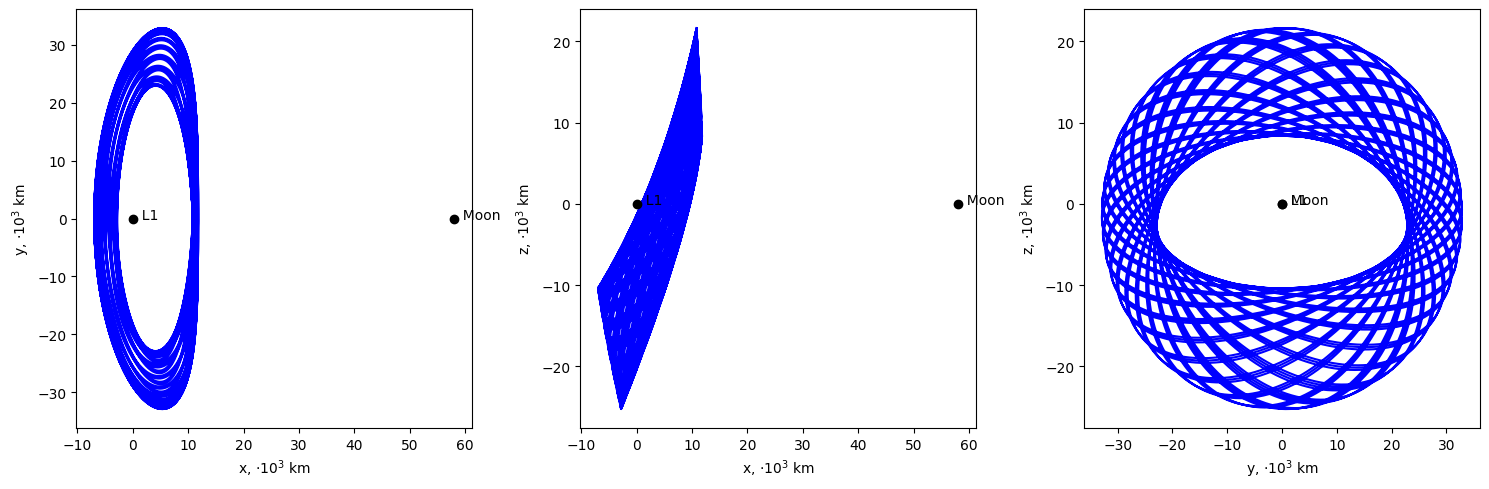

In [43]:
import os

directory = os.fsencode('../data/orbits/1/')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    df = pd.read_csv(f'data/orbits/1/{filename}')
    plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
    ax = plotter.plot_proj(df, centers={'x':model.L1})
    plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


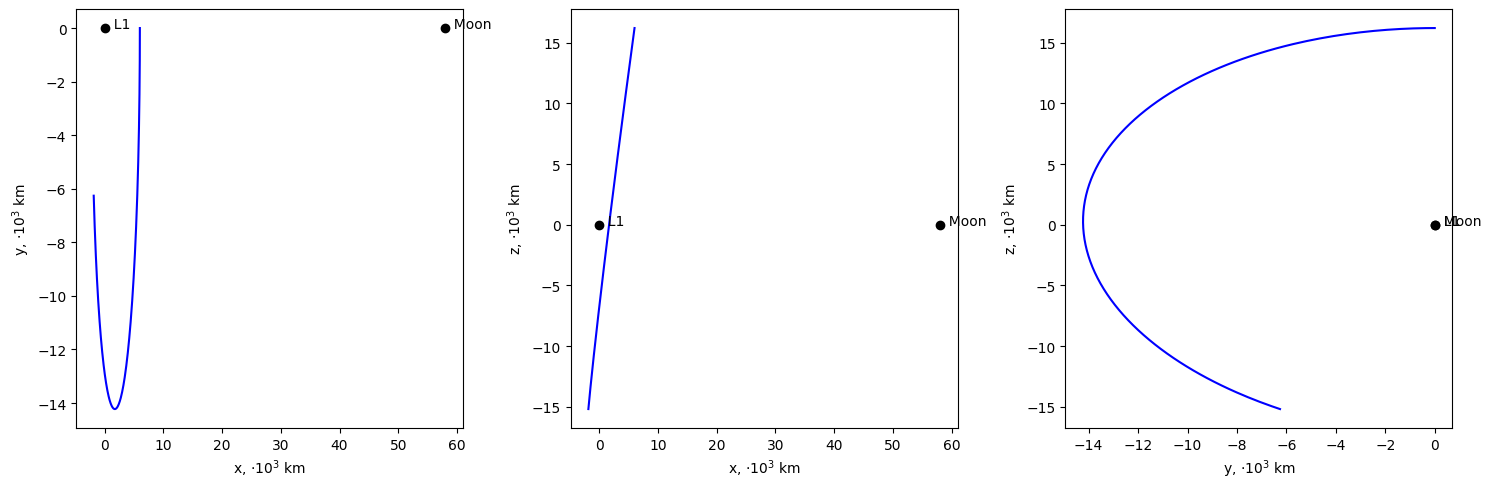

In [53]:
    df = pd.read_csv(
    f'../data/orbits/1/orbit_0.8525032185865169_0.042186579429703844_-0.09080005384727885.csv').head(200)
    plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
    ax = plotter.plot_proj(df, centers={'x':model.L1})
    plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')